In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from IPython.core.display import display, HTML; display(HTML("<style>.container{width:90% !important;}</style>"))

### EDA - Exploratory Data Analysis part,so we can investigate data set and summarize their main characteristics,using data visualization methods.

#### Libaries Import

In [3]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

### Importing data and column names

In [4]:
data = pd.read_csv('Dataset/dataset.csv')

In [5]:
## Data Description

dict_description={'encounter_id' : 'Unique identifier associated with a patient unit stay',
'patient_id': 'Unique identifier associated with a patient',
'hospital_id': 'Unique identifier associated with a hospital',
'age': 'The age of the patient on unit admission',
'bmi': 'The body mass index of the person on unit admission',
'elective_surgery':'Whether the patient was admitted to the hospital for an elective surgical operation',
'ethnicity':'The common national or cultural tradition which the person belongs to',
'gender':'Sex of the patient',
'height':'The height of the person on unit admission',
'icu_admit_source':'The location of the patient prior to being admitted to the unit',
'icu_id':' unique identifier for the unit to which the patient was admitted',
'icu_stay_type':'string',
'icu_type': 'A classification which indicates the type of care the unit is capable of providing',               
'pre_icu_los_days': 'The length of stay of the patient between hospital admission and unit admission',
'weight' :'The weight (body mass) of the person on unit admission',
'apache_2_diagnosis' :'The APACHE II diagnosis for the ICU admission',
'apache_3j_diagnosis' :'The APACHE III-J sub-diagnosis code which best describes the reason for the ICU admission',
'apache_post_operative':'The APACHE operative status; 1 for post-operative, 0 for non-operative',
'arf_apache':' Whether the patient had acute renal failure during the first 24 hours of their unit stay, defined as a 24 hour urine output <410ml, creatinine >=133 micromol/L and no chronic dialysis',
'gcs_eyes_apache':'The eye opening component of the Glasgow Coma Scale measured during the first 24 hours which results in the highest APACHE III score',
'gcs_motor_apache': 'The motor component of the Glasgow Coma Scale measured during the first 24 hours which results in the highest APACHE III score',
'gcs_unable_apache': 'Whether the Glasgow Coma Scale was unable to be assessed due to patient sedation',
 'gcs_verbal_apache': 'The verbal component of the Glasgow Coma Scale measured during the first 24 hours which results in the highest APACHE III score',
'heart_rate_apache': 'The heart rate measured during the first 24 hours which results in the highest APACHE III score',
'intubated_apache': 'Whether the patient was intubated at the time of the highest scoring arterial blood gas used in the oxygenation score',
'map_apache': 'The mean arterial pressure measured during the first 24 hours which results in the highest APACHE III score',
'resprate_apache': 'The respiratory rate measured during the first 24 hours which results in the highest APACHE III score',
'temp_apache': 'The temperature measured during the first 24 hours which results in the highest APACHE III score',
'ventilated_apache': 'Whether the patient was invasively ventilated at the time of the highest scoring arterial blood gas using the oxygenation scoring algorithm, including any mode of positive pressure ventilation delivered through a circuit attached to an endo-tracheal tube or tracheostomy',      
'd1_diasbp_max':"The patient's highest diastolic blood pressure during the first 24 hours of their unit stay, either non-invasively or invasively measured",
'd1_diasbp_min':"The patient's lowest diastolic blood pressure during the first 24 hours of their unit stay, either non-invasively or invasively measured",
'd1_diasbp_noninvasive_max':"The patient's highest diastolic blood pressure during the first 24 hours of their unit stay, non-invasively measured",
'd1_diasbp_noninvasive_min':"The patient's lowest diastolic blood pressure during the first 24 hours of their unit stay, non-invasively measured",
'd1_heartrate_max':"The patient's highest heart rate during the first 24 hours of their unit stay",
'd1_heartrate_min':"The patient's lowest heart rate during the first 24 hours of their unit stay",
'd1_mbp_max':"The patient's highest mean blood pressure during the first 24 hours of their unit stay, either non-invasively or invasively measured",
'd1_mbp_min':"The patient's lowest mean blood pressure during the first 24 hours of their unit stay, either non-invasively or invasively measured",
'd1_mbp_noninvasive_max':"The patient's highest mean blood pressure during the first 24 hours of their unit stay, non-invasively measured",
'd1_mbp_noninvasive_min':"The patient's lowest mean blood pressure during the first 24 hours of their unit stay, non-invasively measured",
'd1_resprate_max':"The patient's highest respiratory rate during the first 24 hours of their unit stay",
'd1_resprate_min':"The patient's lowest respiratory rate during the first 24 hours of their unit stay",
'd1_spo2_max':"The patient's highest peripheral oxygen saturation during the first 24 hours of their unit stay",
'd1_spo2_min':"The patient's lowest peripheral oxygen saturation during the first 24 hours of their unit stay",
'd1_sysbp_max':"The patient's highest systolic blood pressure :uring the first 24 hours of their unit stay, either non-invasively or invasively measured",
'd1_sysbp_min':"The patient's lowest systolic blood pressure :uring the first 24 hours of their unit stay, either non-invasively or invasively measured",
'd1_sysbp_noninvasive_max':"The patient': highest systolic blood pressure during the first 24 hours of their unit stay, invasively measured",
'd1_sysbp_noninvasive_min':"The patient': lowest systolic blood pressure during the first 24 hours of their unit stay, invasively measured",
'd1_temp_max':"The patient:s highest core temperature during the first 24 hours of their unit stay, invasively measured",
'd1_temp_min':"The patient's lowest core temperature during the first 24 hours of their unit stay",
'h1_diasbp_max':"The patient's highest diastolic blood :ressure during the first hour of their unit stay, either non-invasively or invasively measured",
'h1_diasbp_min':"The patient's lowest diastolic blood :ressure during the first hour of their unit stay, either non-invasively or invasively measured",
'h1_diasbp_noninvasive_max':"The patient:s highest diastolic blood pressure during the first hour of their unit stay, invasively measured",
'h1_diasbp_noninvasive_min':"The patient:s lowest diastolic blood pressure during the first hour of their unit stay, invasively measured",
'h1_heartrate_max':"The patient's highest heart rate during the first hour of their unit stay",
'h1_heartrate_min':"The patient's lowest heart rate during the first hour of their unit stay",
'h1_mbp_max':"The patient's highest mean blood :ressure during the first hour of their unit stay, either non-invasively or invasively measured",
'h1_mbp_min':"The patient's lowest mean blood :ressure during the first hour of their unit stay, either non-invasively or invasively measured",
'h1_mbp_noninvasive_max':"The patient's :ighest mean blood pressure during the first hour of their unit stay, non-invasively measured",
'h1_mbp_noninvasive_min':"The patient's :owest mean blood pressure during the first hour of their unit stay, non-invasively measured",
'h1_resprate_max':"The patient's highest respiratory rate during the first hour of their unit stay",
'h1_resprate_min':"The patient's lowest respiratory rate during the first hour of their unit stay",
'h1_spo2_max':"The patient's highest peripheral oxygen saturation during the first hour of their unit stay",
'h1_spo2_min':"The patient's lowest peripheral oxygen saturation during the first hour of their unit stay",
'h1_sysbp_max':"The patient's highest systolic blood pressure during the first hour of their unit stay, either non-invasively or invasively measured",
'h1_sysbp_min':"The patient's lowest systolic blood pressure during the first hour of their unit stay, either non-invasively or invasively measured",
'h1_sysbp_noninvasive_max':"The patient's highest systolic blood pressure during the first hour of their unit stay, non-invasively measured",
'h1_sysbp_noninvasive_min':"The patient's lowest systolic blood pressure during the first hour of their unit stay, non-invasively measured",
'd1_glucose_max':"The highest glucose concentration of the patient in their serum or plasma during the first 24 hours of their unit stay",
'd1_glucose_min':"The lowest glucose concentration of the patient in their serum or plasma during the first 24 hours of their unit stay",
'd1_potassium_max':"The highest potassium concentration for the patient in their serum or plasma during the first 24 hours of their unit stay",
'd1_potassium_min':"The lowest potassium concentration for the patient in their serum or plasma during the first 24 hours of their unit stay",
'apache_4a_hospital_death_prob':"The APACHE IVa probabilistic prediction of in-hospital mortality for the patient which utilizes the APACHE III score and other covariates, including diagnosis.",
'apache_4a_icu_death_prob':"The APACHE IVa probabilistic prediction of in ICU mortality for the patient which utilizes the APACHE III score and other covariates, including diagnosis",
'aids':"Whether the patient has a definitive diagnosis of acquired immune deficiency syndrome (AIDS) (not HIV positive alone)",
'cirrhosis':"Whether the patient has a history of heavy alcohol use with portal hypertension and varices, other causes of cirrhosis with evidence of portal hypertension and varices, or biopsy proven cirrhosis. This comorbidity does not apply to patients with a functioning liver transplant.",
'diabetes_mellitus':"Whether the patient has been diagnosed with diabetes, either juvenile or adult onset, which requires medication.",
'hepatic_failure':"Whether the patient has cirrhosis and additional complications including jaundice and ascites, upper GI bleeding, hepatic encephalopathy, or coma.",
'immunosuppression':"Whether the patient has their immune system suppressed within six months prior to ICU admission for any of the following reasons; radiation therapy, chemotherapy, use of non-cytotoxic immunosuppressive drugs, high dose steroids (at least 0.3 mg/kg/day of methylprednisolone or equivalent for at least 6 months).",
'leukemia':"Whether the patient has been diagnosed with acute or chronic myelogenous leukemia, acute or chronic lymphocytic leukemia, or multiple myeloma.",
'lymphoma':"Whether the patient has been diagnosed with non-Hodgkin lymphoma.",
'solid_tumor_with_metastasis':"Whether the patient has been diagnosed with any solid tumor carcinoma (including malignant melanoma) which has evidence of metastasis.",
'apache_3j_bodysystem':"Admission diagnosis group for APACHE III",
'apache_2_bodysystem':"Admission diagnosis group for APACHE II",
'hospital_death':"Whether the patient died during this hospitalization"}

### Data Exploration

In [6]:
data.shape #shape will fetch the tuple of dataframe

(91713, 85)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

### what is % of missing values

In [8]:
data.isnull().sum().sum()/(data.size)*100

3.694979414683017

#### In dataset we have ~3.7% missing values

### Checking for duplicates

In [9]:
data.duplicated().sum()

0

### As there is no value in column 83 so we can drop that column

In [10]:
data.drop('Unnamed: 83',axis=1,inplace=True)

In [11]:
data.describe().T #returns description of the data in the DataFrame

,count,mean,std,min,25%,50%,75%,max
encounter_id,91713.0,65606.079280,37795.088538,1.000000,32852.000000,65665.000000,98342.000000,131051.00000
patient_id,91713.0,65537.131464,37811.252183,1.000000,32830.000000,65413.000000,98298.000000,131051.00000
hospital_id,91713.0,105.669262,62.854406,2.000000,47.000000,109.000000,161.000000,204.00000
age,87485.0,62.309516,16.775119,16.000000,52.000000,65.000000,75.000000,89.00000
bmi,88284.0,29.185818,8.275142,14.844926,23.641975,27.654655,32.930206,67.81499
...,...,...,...,...,...,...,...,...
immunosuppression,90998.0,0.026165,0.159628,0.000000,0.000000,0.000000,0.000000,1.00000
leukemia,90998.0,0.007066,0.083763,0.000000,0.000000,0.000000,0.000000,1.00000
lymphoma,90998.0,0.004132,0.064148,0.000000,0.000000,0.000000,0.000000,1.00000
solid_tumor_with_metastasis,90998.0,0.020638,0.142169,0.000000,0.000000,0.000000,0.000000,1.00000


### Focusing on our target variable

In [12]:
data.hospital_death.unique()

array([0, 1], dtype=int64)

In [13]:
data.hospital_death.value_counts()

0    83798
1     7915
Name: hospital_death, dtype: int64

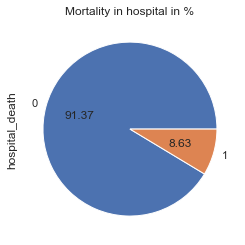

In [14]:
### Visulizing the death ratio
death_ratio =data.hospital_death.value_counts().plot(kind='pie',autopct="%.2f",title ='Mortality in hospital in %')

### In the dataset exist around 8.5% mortality class(1). So we have unbalanced classes in this case.

#### Trying Heatmap to see the relationship between variables.

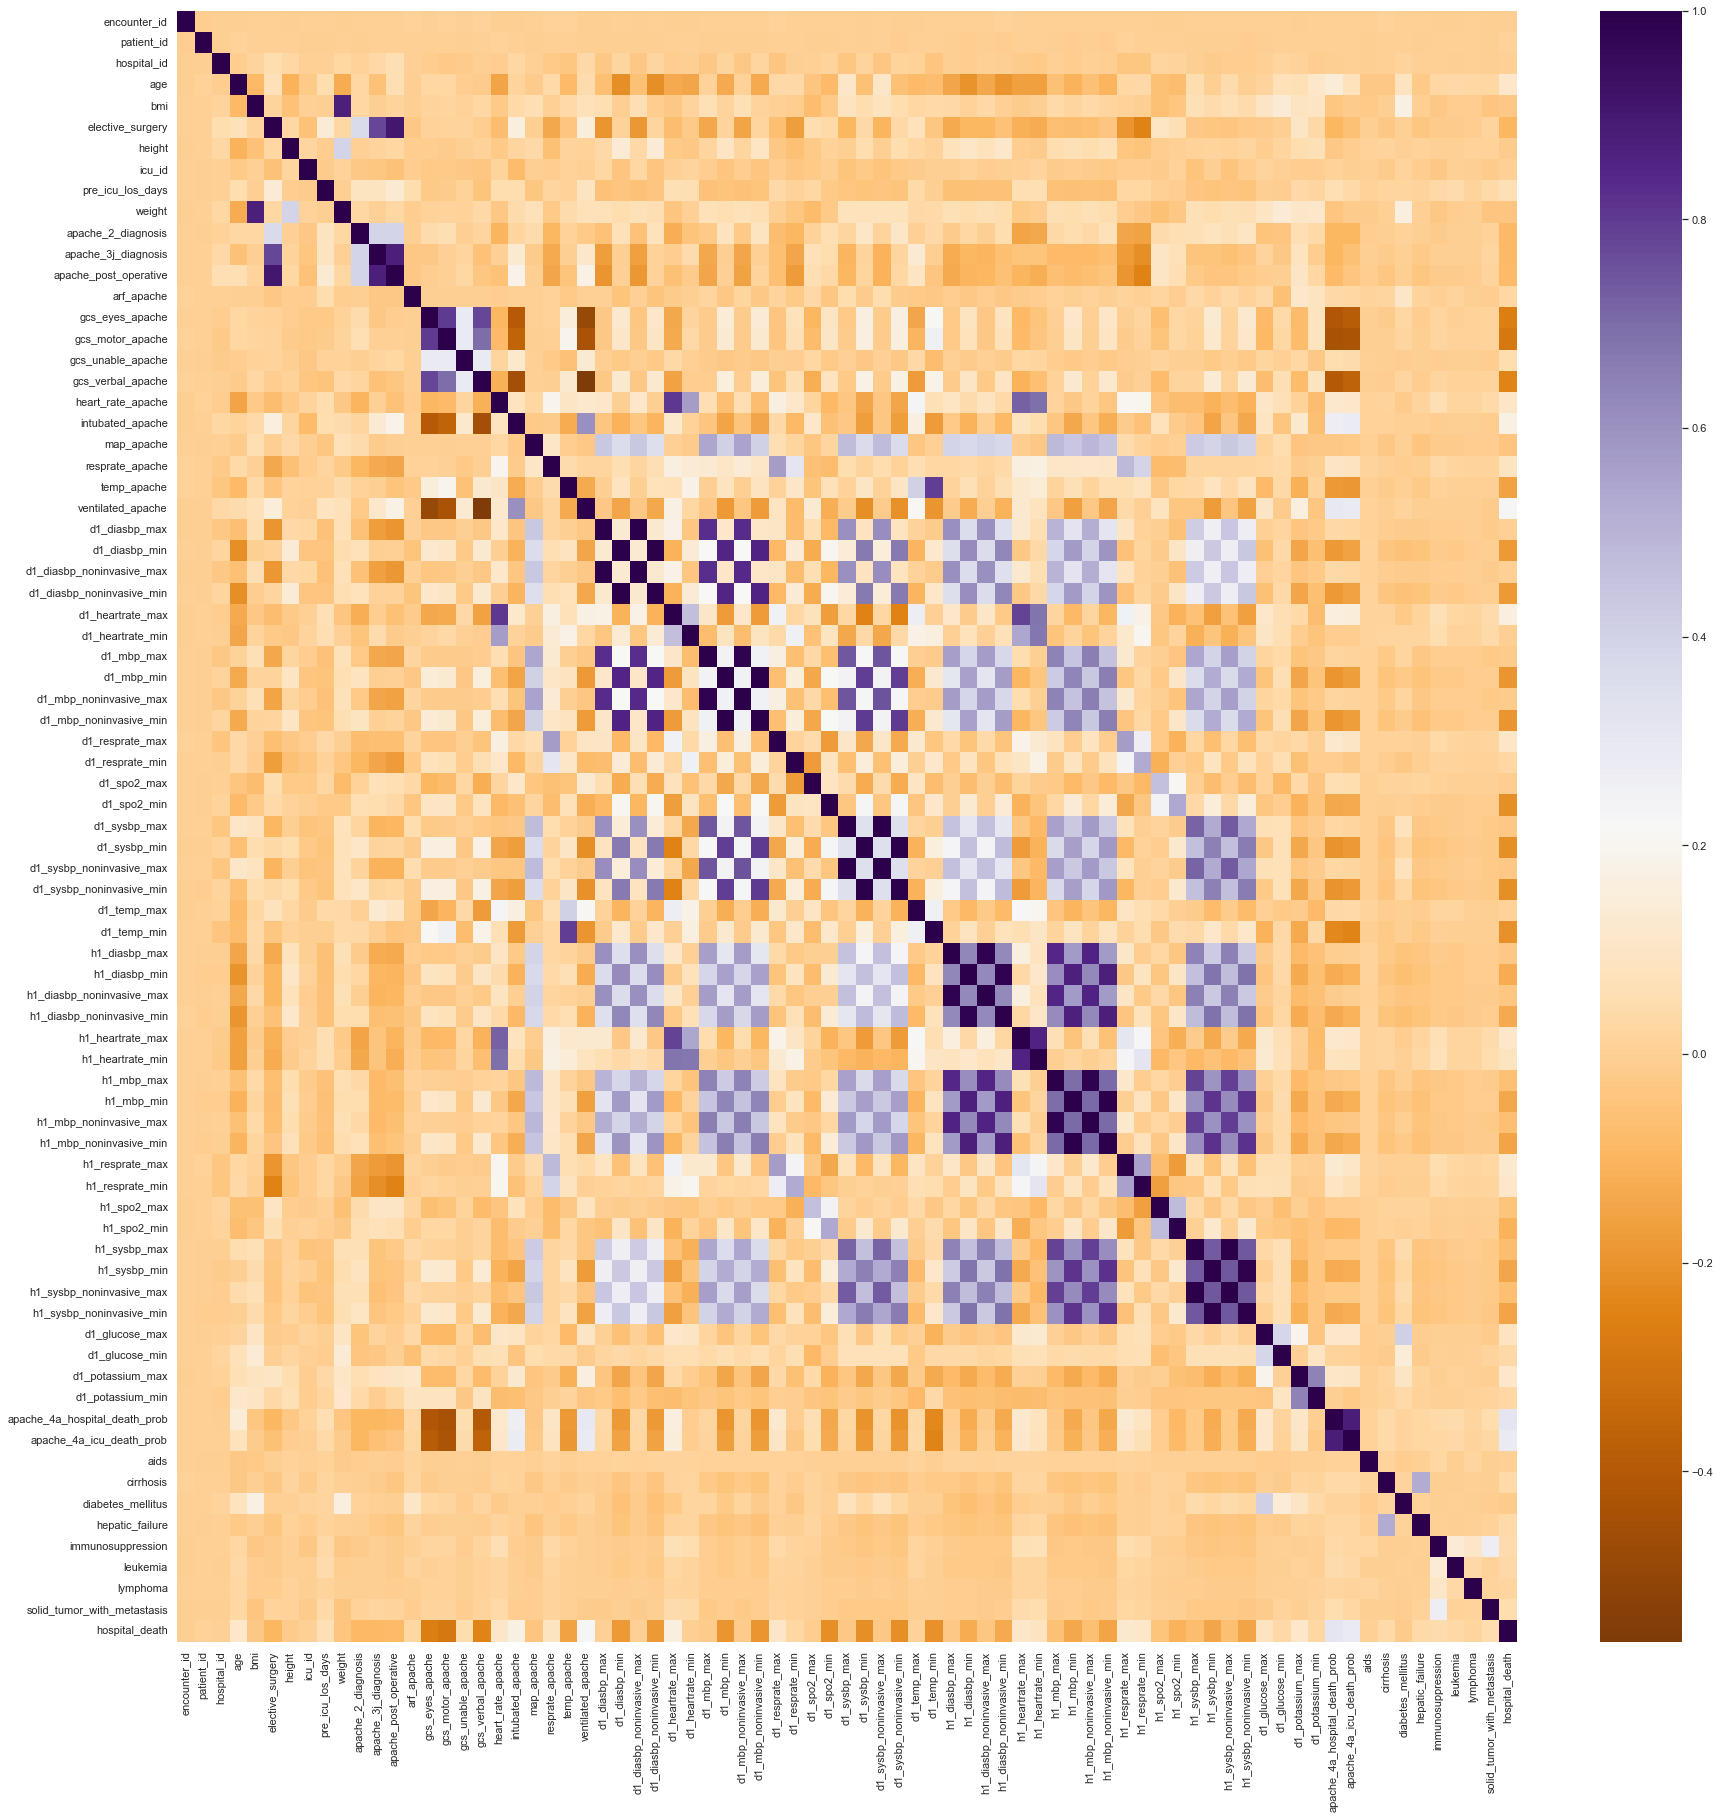

In [15]:
plt.figure(figsize=(30,30))
heatmap_viz=sns.heatmap(data.corr(),cmap='PuOr')

### Some variables can be explained by other variables. As we can cath on heatmap dark squares it means variables are correlated((others squares than diagonal of heatmap))

AGE

0    68.0
1    77.0
2    25.0
3    81.0
4    19.0
Name: age, dtype: float64

Description: The age of the patient on unit admission


Number of Null values:
4228

Value Counts:
67.0    2271
68.0    2173
71.0    2141
72.0    2110
66.0    2059
        ... 
19.0     343
20.0     338
18.0     259
17.0     126
16.0      44
Name: age, Length: 74, dtype: int64

count    87485.000000
mean        62.309516
std         16.775119
min         16.000000
25%         52.000000
50%         65.000000
75%         75.000000
max         89.000000
Name: age, dtype: float64



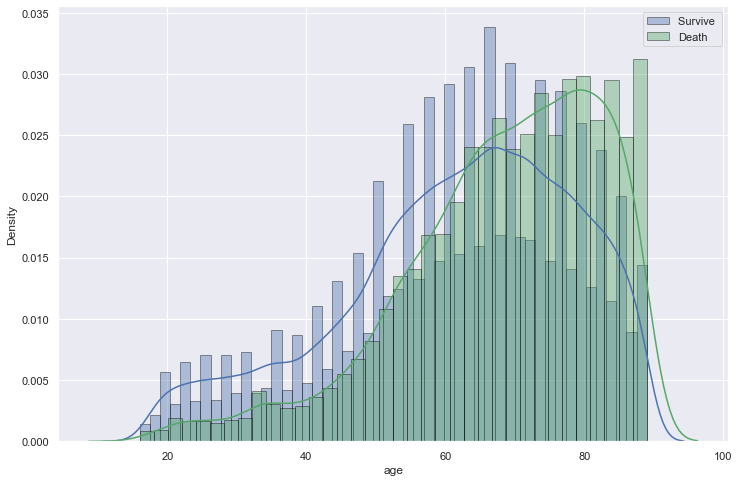

_______________________________________________________________________________
BMI

0    22.73
1    27.42
2    31.95
3    22.64
4      NaN
Name: bmi, dtype: float64

Description: The body mass index of the person on unit admission


Number of Null values:
3429

Value Counts:
14.844926    443
67.814990    422
24.017768     87
24.208110     86
27.359332     82
            ... 
61.796764      1
23.241435      1
26.130528      1
24.463976      1
47.179671      1
Name: bmi, Length: 34888, dtype: int64

count    88284.000000
mean        29.185818
std          8.275142
min         14.844926
25%         23.641975
50%         27.654655
75%         32.930206
max         67.814990
Name: bmi, dtype: float64



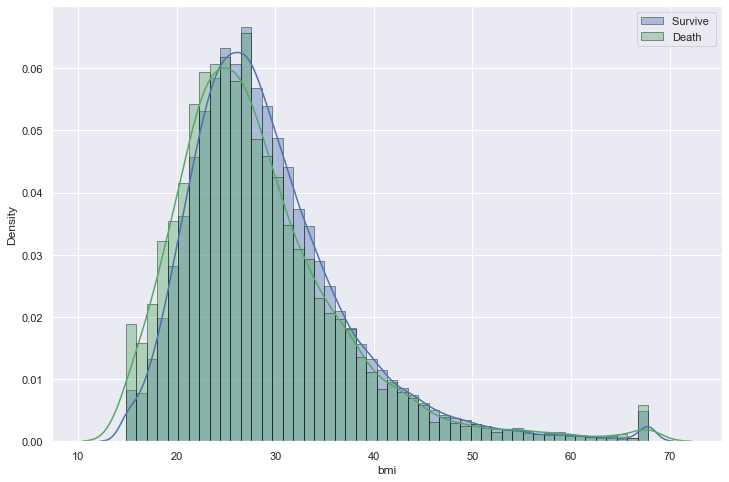

_______________________________________________________________________________
ELECTIVE_SURGERY

0    0
1    0
2    0
3    1
4    0
Name: elective_surgery, dtype: int64

Description: Whether the patient was admitted to the hospital for an elective surgical operation


Number of Null values:
0

Value Counts:
0    74862
1    16851
Name: elective_surgery, dtype: int64

count    91713.000000
mean         0.183736
std          0.387271
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: elective_surgery, dtype: float64



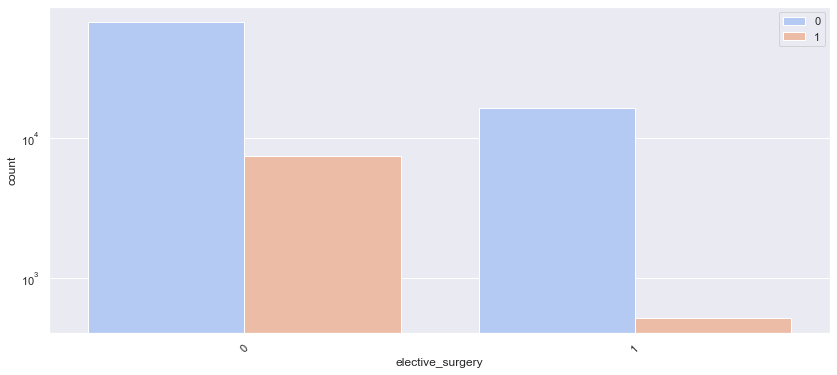

_______________________________________________________________________________
ETHNICITY

0    Caucasian
1    Caucasian
2    Caucasian
3    Caucasian
4    Caucasian
Name: ethnicity, dtype: object

Description: The common national or cultural tradition which the person belongs to


Number of Null values:
1395

Value Counts:
Caucasian           70684
African American     9547
Other/Unknown        4374
Hispanic             3796
Asian                1129
Native American       788
Name: ethnicity, dtype: int64

count         90318
unique            6
top       Caucasian
freq          70684
Name: ethnicity, dtype: object



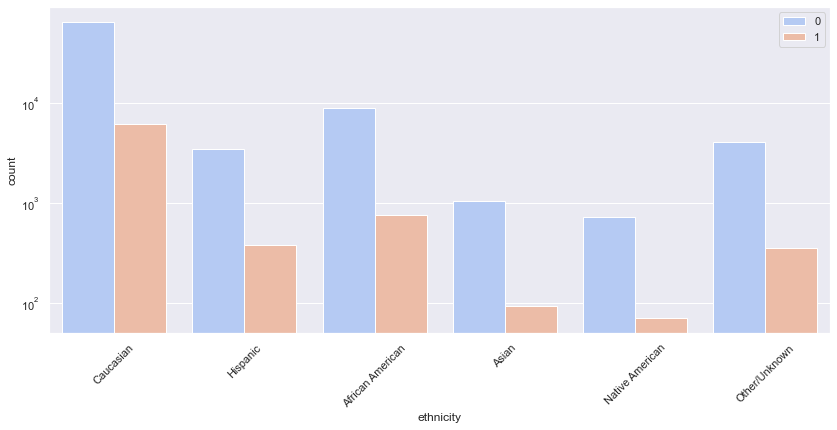

_______________________________________________________________________________
GENDER

0    M
1    F
2    F
3    F
4    M
Name: gender, dtype: object

Description: Sex of the patient


Number of Null values:
25

Value Counts:
M    49469
F    42219
Name: gender, dtype: int64

count     91688
unique        2
top           M
freq      49469
Name: gender, dtype: object



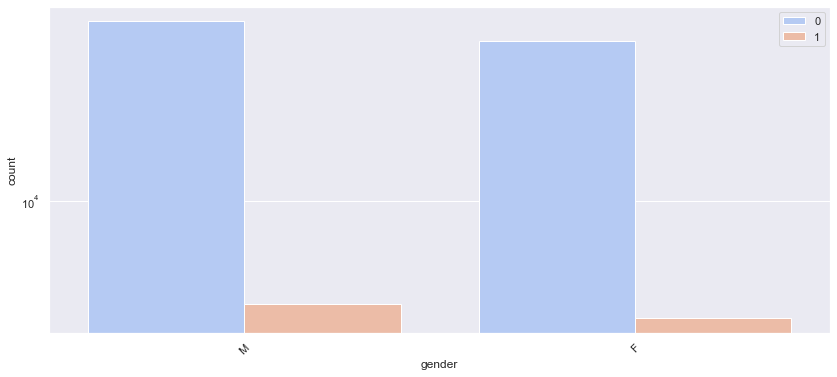

_______________________________________________________________________________
HEIGHT

0    180.3
1    160.0
2    172.7
3    165.1
4    188.0
Name: height, dtype: float64

Description: The height of the person on unit admission


Number of Null values:
1334

Value Counts:
167.6    5362
177.8    5289
160.0    5238
172.7    4834
165.1    4772
         ... 
173.6       1
176.9       1
169.3       1
183.6       1
186.2       1
Name: height, Length: 401, dtype: int64

count    90379.000000
mean       169.641588
std         10.795378
min        137.200000
25%        162.500000
50%        170.100000
75%        177.800000
max        195.590000
Name: height, dtype: float64



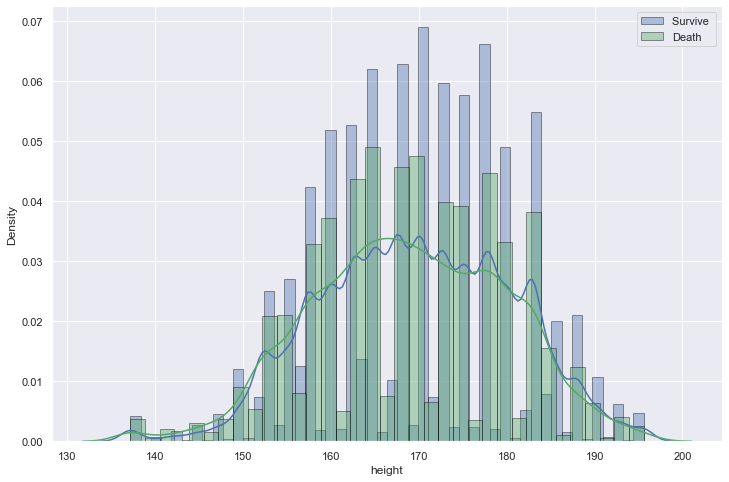

_______________________________________________________________________________
ICU_ADMIT_SOURCE

0                        Floor
1                        Floor
2         Accident & Emergency
3    Operating Room / Recovery
4         Accident & Emergency
Name: icu_admit_source, dtype: object

Description: The location of the patient prior to being admitted to the unit


Number of Null values:
112

Value Counts:
Accident & Emergency         54060
Operating Room / Recovery    18713
Floor                        15611
Other Hospital                2358
Other ICU                      859
Name: icu_admit_source, dtype: int64

count                    91601
unique                       5
top       Accident & Emergency
freq                     54060
Name: icu_admit_source, dtype: object



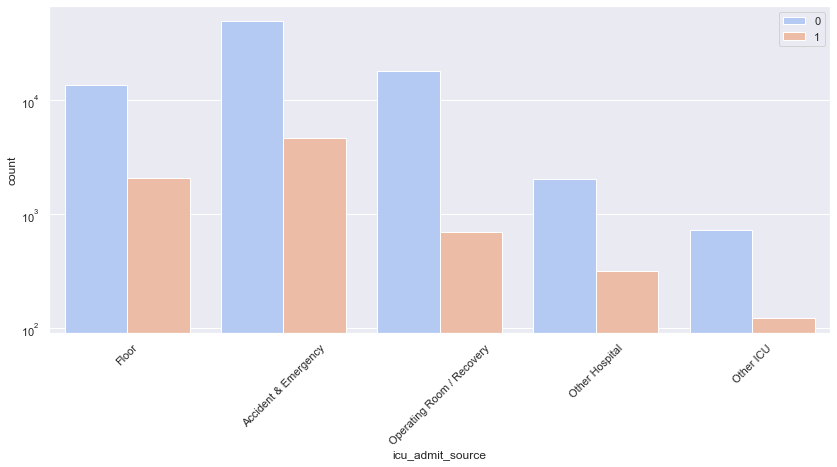

_______________________________________________________________________________
ICU_ID

0    92
1    90
2    93
3    92
4    91
Name: icu_id, dtype: int64

Description:  unique identifier for the unit to which the patient was admitted


Number of Null values:
0

Value Counts:
646    1325
653    1307
876    1284
413    1239
236    1140
       ... 
494       3
365       2
302       2
603       2
241       1
Name: icu_id, Length: 241, dtype: int64

count    91713.000000
mean       508.357692
std        228.989661
min         82.000000
25%        369.000000
50%        504.000000
75%        679.000000
max        927.000000
Name: icu_id, dtype: float64



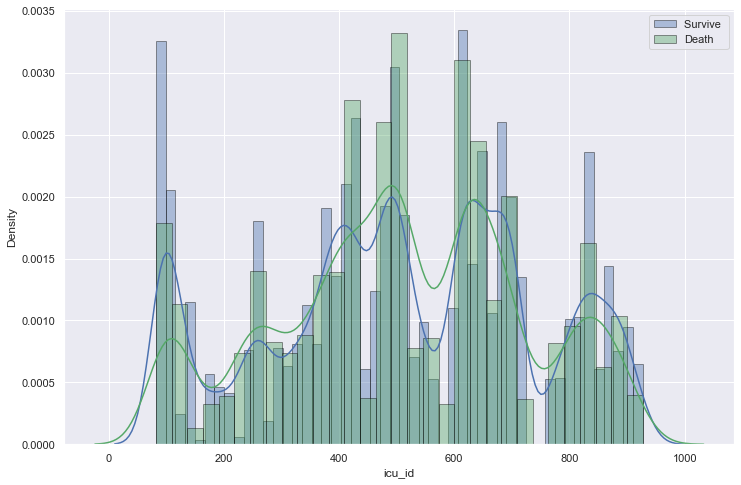

_______________________________________________________________________________
ICU_STAY_TYPE

0    admit
1    admit
2    admit
3    admit
4    admit
Name: icu_stay_type, dtype: object

Description: string


Number of Null values:
0

Value Counts:
admit       86183
transfer     4970
readmit       560
Name: icu_stay_type, dtype: int64

count     91713
unique        3
top       admit
freq      86183
Name: icu_stay_type, dtype: object



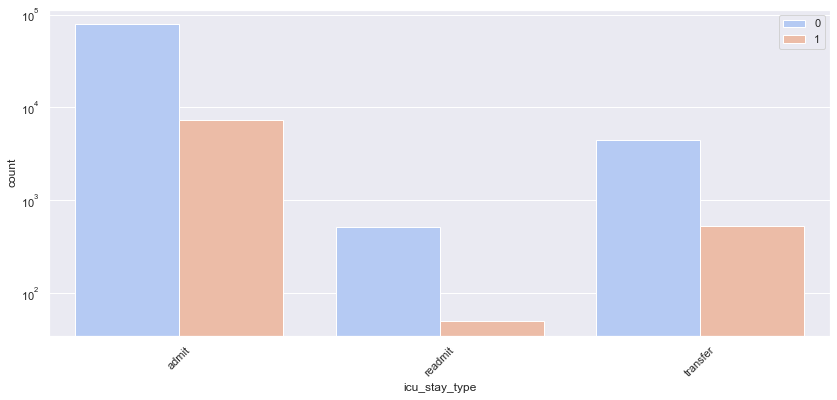

_______________________________________________________________________________
ICU_TYPE

0           CTICU
1    Med-Surg ICU
2    Med-Surg ICU
3           CTICU
4    Med-Surg ICU
Name: icu_type, dtype: object

Description: A classification which indicates the type of care the unit is capable of providing


Number of Null values:
0

Value Counts:
Med-Surg ICU    50586
MICU             7695
Neuro ICU        7675
CCU-CTICU        7156
SICU             5209
Cardiac ICU      4776
CSICU            4613
CTICU            4003
Name: icu_type, dtype: int64

count            91713
unique               8
top       Med-Surg ICU
freq             50586
Name: icu_type, dtype: object



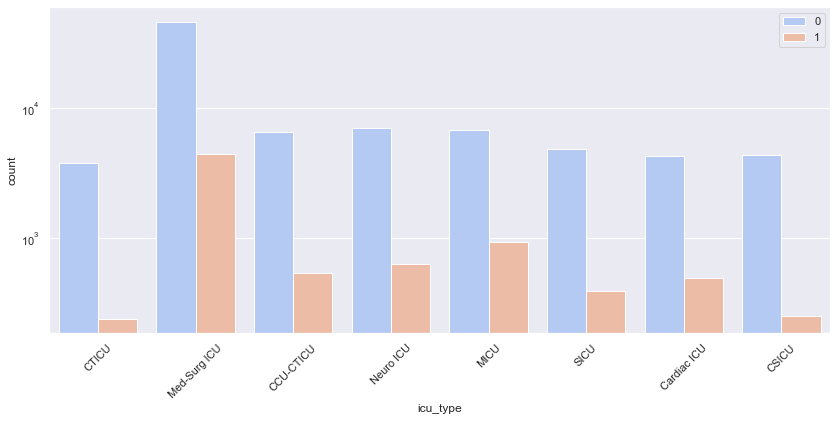

_______________________________________________________________________________
PRE_ICU_LOS_DAYS

0    0.541667
1    0.927778
2    0.000694
3    0.000694
4    0.073611
Name: pre_icu_los_days, dtype: float64

Description: The length of stay of the patient between hospital admission and unit admission


Number of Null values:
0

Value Counts:
 0.000000     3711
 0.000694     1403
 0.001389     1011
 0.002083      887
 0.002778      811
              ... 
 8.465972        1
 3.475000        1
 7.479167        1
 13.685417       1
-3.593056        1
Name: pre_icu_los_days, Length: 9757, dtype: int64

count    91713.000000
mean         0.835766
std          2.487756
min        -24.947222
25%          0.035417
50%          0.138889
75%          0.409028
max        159.090972
Name: pre_icu_los_days, dtype: float64



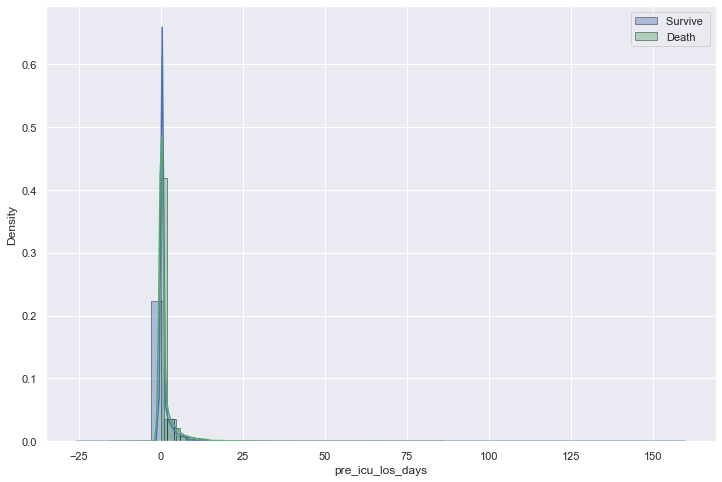

_______________________________________________________________________________
WEIGHT

0    73.9
1    70.2
2    95.3
3    61.7
4     NaN
Name: weight, dtype: float64

Description: The weight (body mass) of the person on unit admission


Number of Null values:
2720

Value Counts:
68.00    974
81.60    887
63.50    843
90.70    778
77.10    738
        ... 
73.23      1
74.72      1
62.92      1
65.41      1
94.46      1
Name: weight, Length: 3409, dtype: int64

count    88993.000000
mean        84.028340
std         25.011497
min         38.600000
25%         66.800000
50%         80.300000
75%         97.100000
max        186.000000
Name: weight, dtype: float64



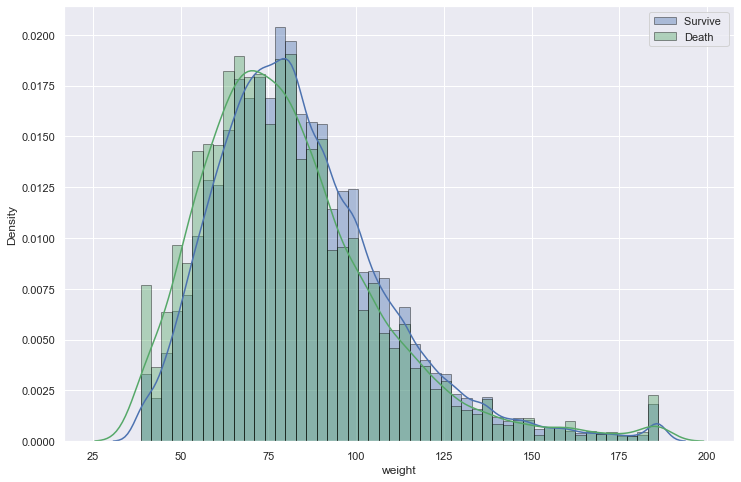

_______________________________________________________________________________
APACHE_2_DIAGNOSIS

0    113.0
1    108.0
2    122.0
3    203.0
4    119.0
Name: apache_2_diagnosis, dtype: float64

Description: The APACHE II diagnosis for the ICU admission


Number of Null values:
1662

Value Counts:
113.0    11740
301.0     6807
302.0     6702
112.0     4350
308.0     4114
117.0     3923
124.0     3906
122.0     3768
303.0     3329
110.0     3206
304.0     3104
203.0     2631
202.0     2481
106.0     2476
305.0     2275
114.0     2257
121.0     2215
123.0     2064
102.0     1883
307.0     1818
119.0     1721
120.0     1377
118.0     1355
108.0     1177
214.0     1167
109.0     1071
105.0     1037
213.0      750
207.0      643
306.0      638
218.0      553
217.0      483
209.0      480
219.0      461
101.0      376
104.0      363
103.0      291
115.0      251
116.0      204
107.0      197
215.0      159
208.0      123
212.0       99
216.0       26
Name: apache_2_diagnosis, dtype: int64


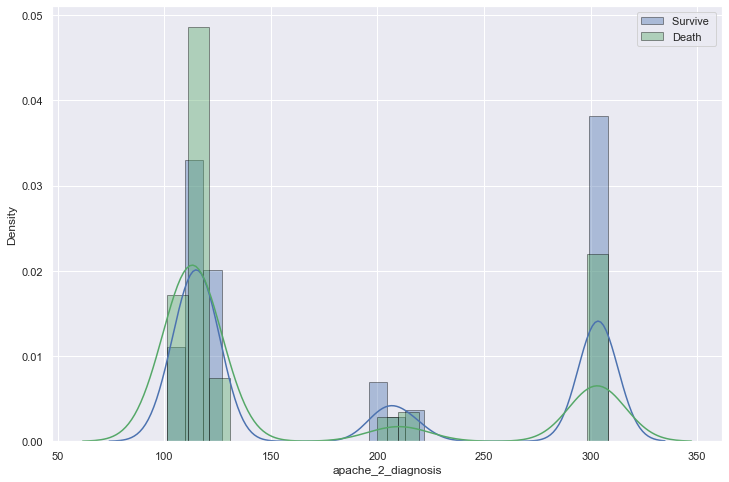

_______________________________________________________________________________
APACHE_3J_DIAGNOSIS

0     502.01
1     203.01
2     703.03
3    1206.03
4     601.01
Name: apache_3j_diagnosis, dtype: float64

Description: The APACHE III-J sub-diagnosis code which best describes the reason for the ICU admission


Number of Null values:
1101

Value Counts:
501.05     4481
107.01     4350
106.01     3923
403.01     3789
703.03     3106
           ... 
1803.01       1
301.04        1
1101.05       1
0.01          1
1202.01       1
Name: apache_3j_diagnosis, Length: 399, dtype: int64

count    90612.000000
mean       558.216377
std        463.266985
min          0.010000
25%        203.010000
50%        409.020000
75%        703.030000
max       2201.050000
Name: apache_3j_diagnosis, dtype: float64



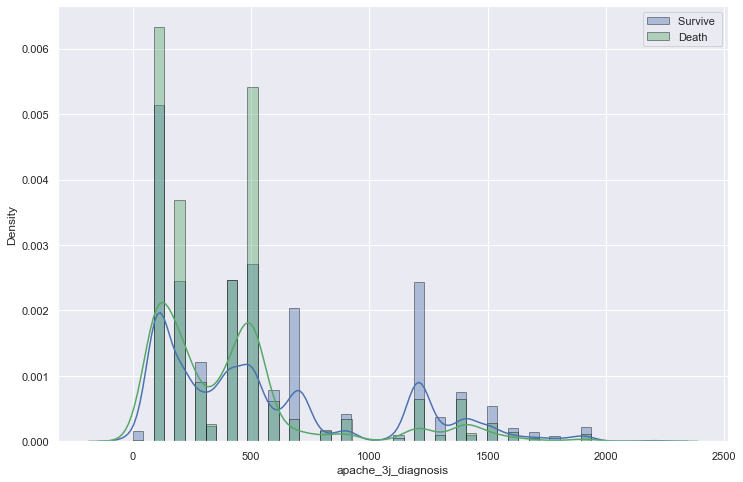

_______________________________________________________________________________
APACHE_POST_OPERATIVE

0    0
1    0
2    0
3    1
4    0
Name: apache_post_operative, dtype: int64

Description: The APACHE operative status; 1 for post-operative, 0 for non-operative


Number of Null values:
0

Value Counts:
0    73269
1    18444
Name: apache_post_operative, dtype: int64

count    91713.000000
mean         0.201106
std          0.400829
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: apache_post_operative, dtype: float64



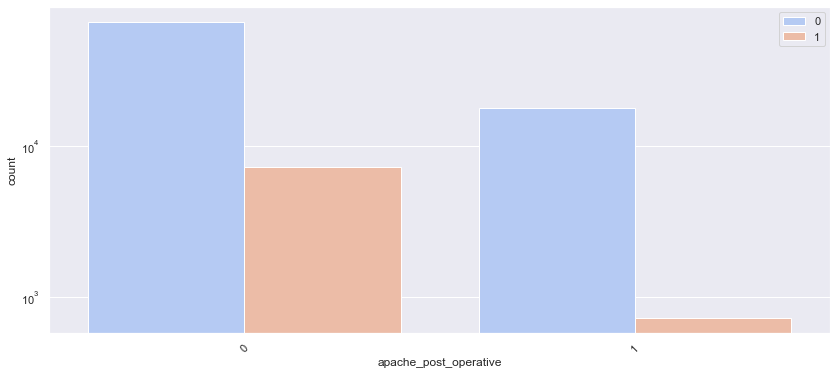

_______________________________________________________________________________
ARF_APACHE

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: arf_apache, dtype: float64

Description:  Whether the patient had acute renal failure during the first 24 hours of their unit stay, defined as a 24 hour urine output <410ml, creatinine >=133 micromol/L and no chronic dialysis


Number of Null values:
715

Value Counts:
0.0    88452
1.0     2546
Name: arf_apache, dtype: int64

count    90998.000000
mean         0.027979
std          0.164912
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: arf_apache, dtype: float64



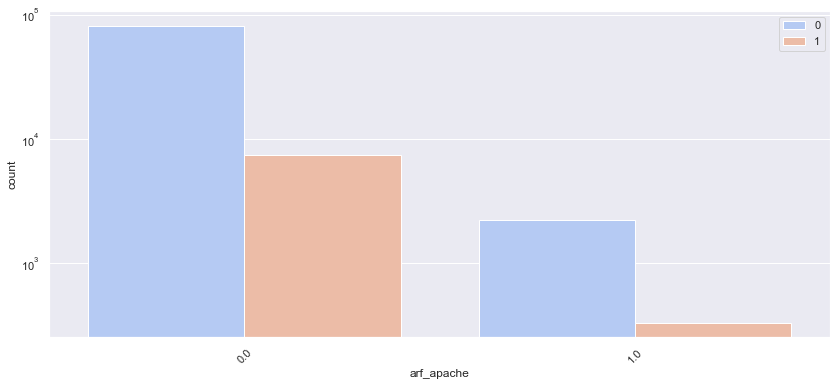

_______________________________________________________________________________
GCS_EYES_APACHE

0    3.0
1    1.0
2    3.0
3    4.0
4    NaN
Name: gcs_eyes_apache, dtype: float64

Description: The eye opening component of the Glasgow Coma Scale measured during the first 24 hours which results in the highest APACHE III score


Number of Null values:
1901

Value Counts:
4.0    62995
3.0    13863
1.0     8274
2.0     4680
Name: gcs_eyes_apache, dtype: int64

count    89812.000000
mean         3.465049
std          0.951715
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          4.000000
Name: gcs_eyes_apache, dtype: float64



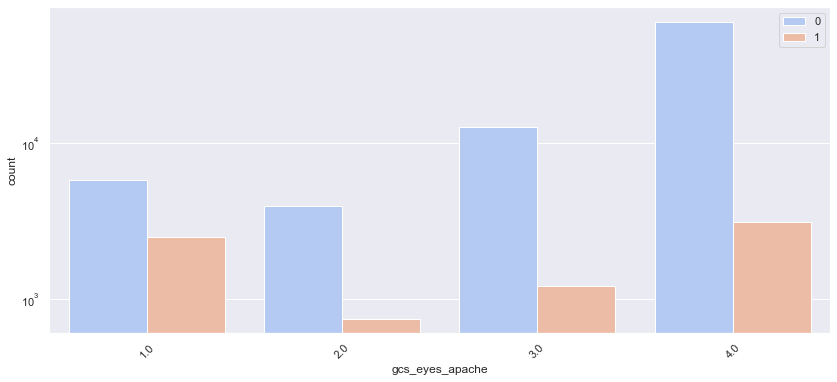

_______________________________________________________________________________
GCS_MOTOR_APACHE

0    6.0
1    3.0
2    6.0
3    6.0
4    NaN
Name: gcs_motor_apache, dtype: float64

Description: The motor component of the Glasgow Coma Scale measured during the first 24 hours which results in the highest APACHE III score


Number of Null values:
1901

Value Counts:
6.0    70960
5.0     7982
1.0     5543
4.0     4494
3.0      524
2.0      309
Name: gcs_motor_apache, dtype: int64

count    89812.000000
mean         5.471195
std          1.288376
min          1.000000
25%          6.000000
50%          6.000000
75%          6.000000
max          6.000000
Name: gcs_motor_apache, dtype: float64



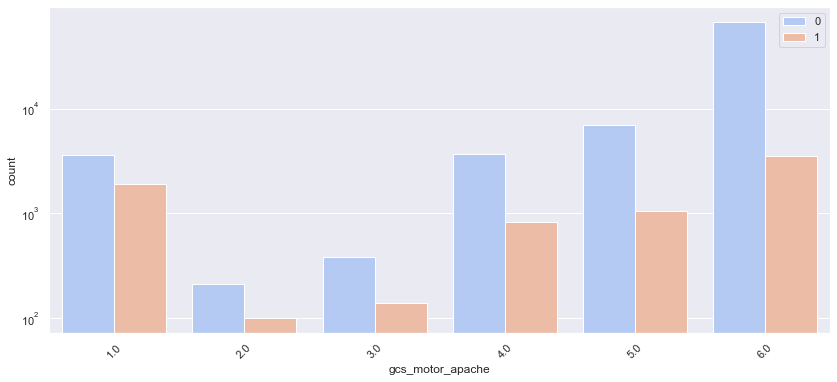

_______________________________________________________________________________
GCS_UNABLE_APACHE

0    0.0
1    0.0
2    0.0
3    0.0
4    NaN
Name: gcs_unable_apache, dtype: float64

Description: Whether the Glasgow Coma Scale was unable to be assessed due to patient sedation


Number of Null values:
1037

Value Counts:
0.0    89812
1.0      864
Name: gcs_unable_apache, dtype: int64

count    90676.000000
mean         0.009528
std          0.097148
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: gcs_unable_apache, dtype: float64



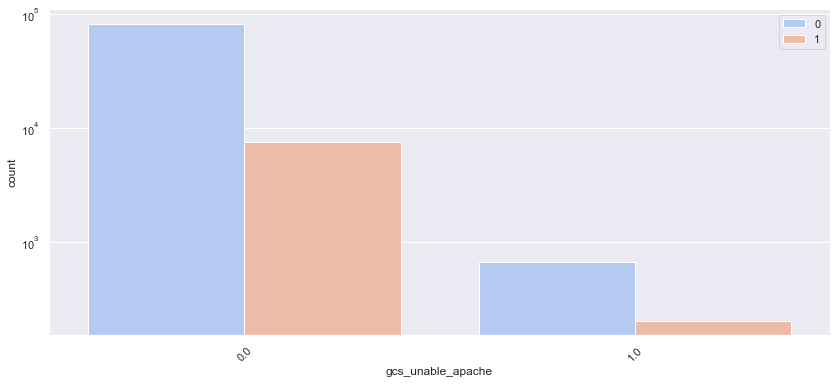

_______________________________________________________________________________
GCS_VERBAL_APACHE

0    4.0
1    1.0
2    5.0
3    5.0
4    NaN
Name: gcs_verbal_apache, dtype: float64

Description: The verbal component of the Glasgow Coma Scale measured during the first 24 hours which results in the highest APACHE III score


Number of Null values:
1901

Value Counts:
5.0    56909
1.0    16741
4.0    10947
3.0     3275
2.0     1940
Name: gcs_verbal_apache, dtype: int64

count    89812.000000
mean         3.994778
std          1.560166
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: gcs_verbal_apache, dtype: float64



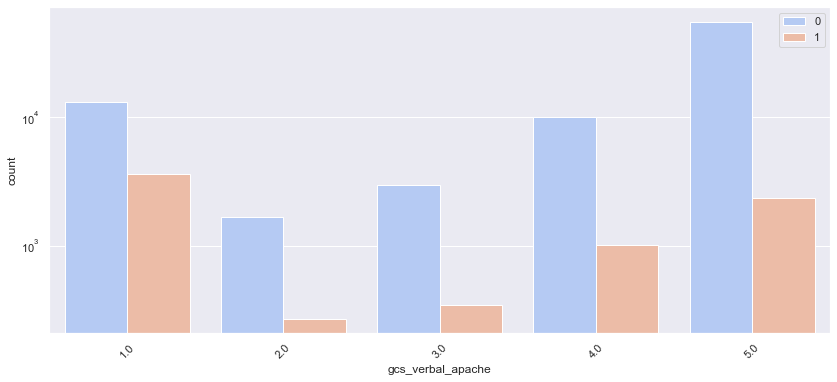

_______________________________________________________________________________
HEART_RATE_APACHE

0    118.0
1    120.0
2    102.0
3    114.0
4     60.0
Name: heart_rate_apache, dtype: float64

Description: The heart rate measured during the first 24 hours which results in the highest APACHE III score


Number of Null values:
878

Value Counts:
100.0    1860
108.0    1806
102.0    1794
104.0    1724
98.0     1716
         ... 
76.0        5
77.0        4
73.0        4
74.0        3
75.0        2
Name: heart_rate_apache, Length: 149, dtype: int64

count    90835.000000
mean        99.707932
std         30.870502
min         30.000000
25%         86.000000
50%        104.000000
75%        120.000000
max        178.000000
Name: heart_rate_apache, dtype: float64



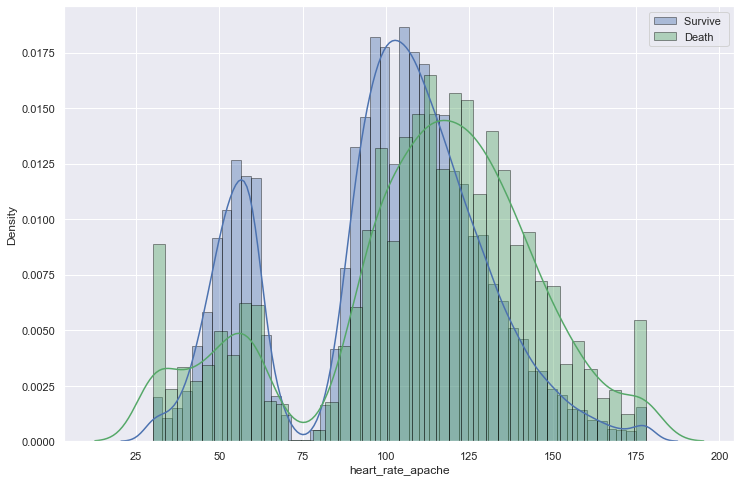

_______________________________________________________________________________
INTUBATED_APACHE

0    0.0
1    0.0
2    0.0
3    1.0
4    0.0
Name: intubated_apache, dtype: float64

Description: Whether the patient was intubated at the time of the highest scoring arterial blood gas used in the oxygenation score


Number of Null values:
715

Value Counts:
0.0    77237
1.0    13761
Name: intubated_apache, dtype: int64

count    90998.000000
mean         0.151223
std          0.358268
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: intubated_apache, dtype: float64



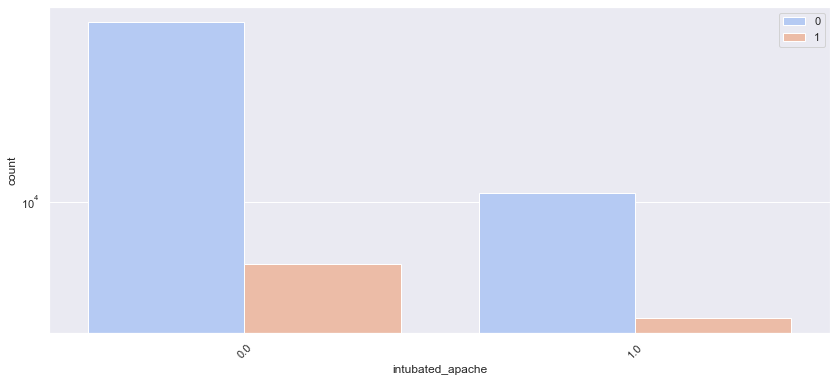

_______________________________________________________________________________
MAP_APACHE

0     40.0
1     46.0
2     68.0
3     60.0
4    103.0
Name: map_apache, dtype: float64

Description: The mean arterial pressure measured during the first 24 hours which results in the highest APACHE III score


Number of Null values:
994

Value Counts:
56.0    2122
54.0    2029
60.0    1971
58.0    1955
53.0    1893
        ... 
90.0       5
87.0       5
91.0       5
88.0       3
92.0       3
Name: map_apache, Length: 161, dtype: int64

count    90719.000000
mean        88.015873
std         42.032412
min         40.000000
25%         54.000000
50%         67.000000
75%        125.000000
max        200.000000
Name: map_apache, dtype: float64



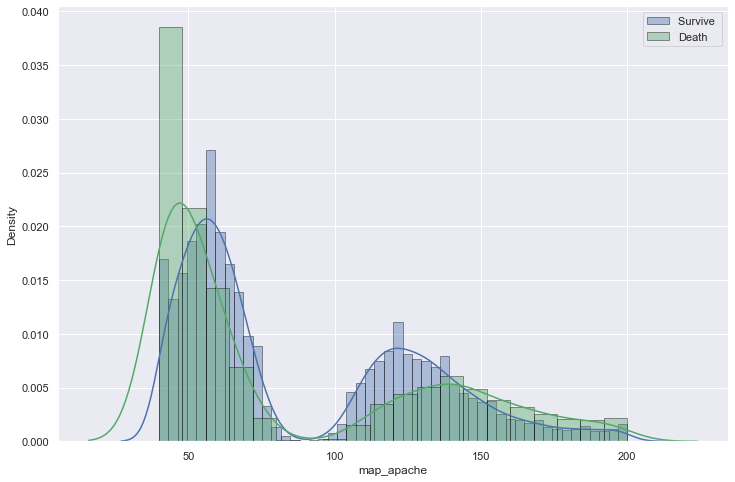

_______________________________________________________________________________
RESPRATE_APACHE

0    36.0
1    33.0
2    37.0
3     4.0
4    16.0
Name: resprate_apache, dtype: float64

Description: The respiratory rate measured during the first 24 hours which results in the highest APACHE III score


Number of Null values:
1234

Value Counts:
10.0    4303
12.0    4221
11.0    3911
4.0     3528
9.0     3432
        ... 
32.7       1
33.6       1
40.4       1
26.5       1
8.4        1
Name: resprate_apache, Length: 74, dtype: int64

count    90479.000000
mean        25.811007
std         15.106312
min          4.000000
25%         11.000000
50%         28.000000
75%         36.000000
max         60.000000
Name: resprate_apache, dtype: float64



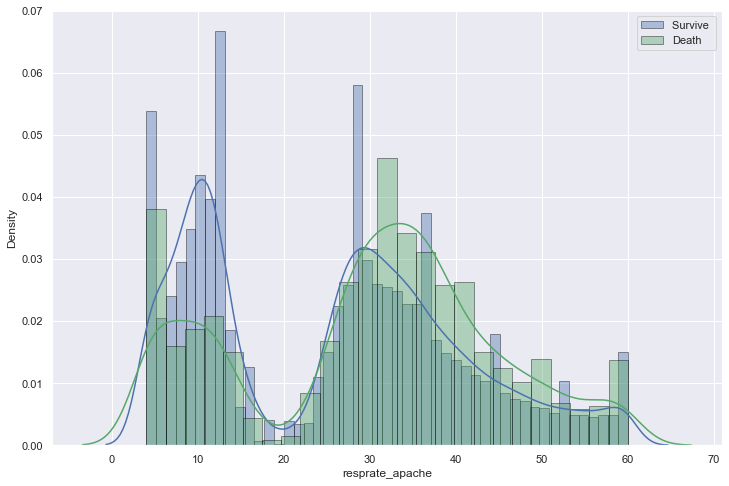

_______________________________________________________________________________
TEMP_APACHE

0    39.3
1    35.1
2    36.7
3    34.8
4    36.7
Name: temp_apache, dtype: float64

Description: The temperature measured during the first 24 hours which results in the highest APACHE III score


Number of Null values:
4108

Value Counts:
36.40    9347
36.60    8572
36.70    8076
36.30    6667
36.50    6193
         ... 
33.33       1
38.44       1
33.61       1
35.22       1
34.16       1
Name: temp_apache, Length: 191, dtype: int64

count    87605.000000
mean        36.414472
std          0.833496
min         32.100000
25%         36.200000
50%         36.500000
75%         36.700000
max         39.700000
Name: temp_apache, dtype: float64



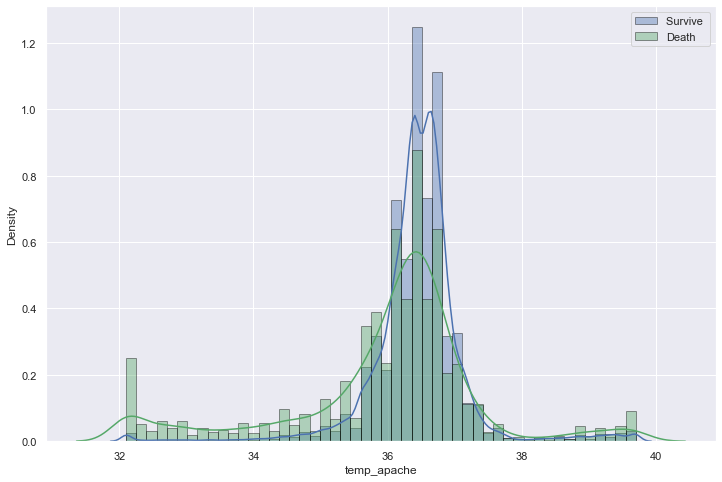

_______________________________________________________________________________
VENTILATED_APACHE

0    0.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: ventilated_apache, dtype: float64

Description: Whether the patient was invasively ventilated at the time of the highest scoring arterial blood gas using the oxygenation scoring algorithm, including any mode of positive pressure ventilation delivered through a circuit attached to an endo-tracheal tube or tracheostomy


Number of Null values:
715

Value Counts:
0.0    61358
1.0    29640
Name: ventilated_apache, dtype: int64

count    90998.000000
mean         0.325721
std          0.468646
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: ventilated_apache, dtype: float64



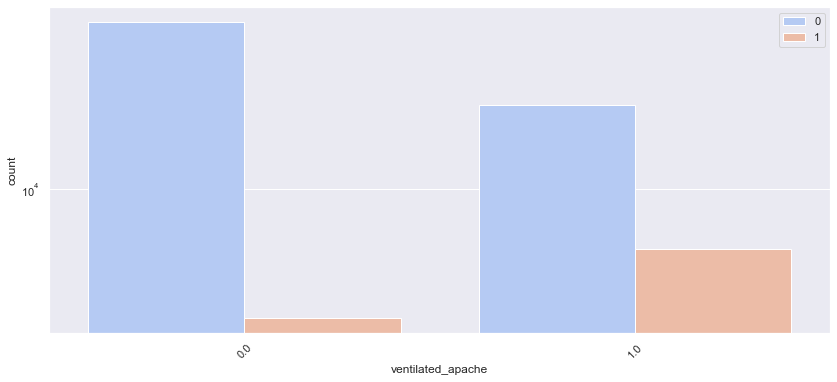

_______________________________________________________________________________
D1_DIASBP_MAX

0    68.0
1    95.0
2    88.0
3    48.0
4    99.0
Name: d1_diasbp_max, dtype: float64

Description: The patient's highest diastolic blood pressure during the first 24 hours of their unit stay, either non-invasively or invasively measured


Number of Null values:
165

Value Counts:
80.0     2113
84.0     2104
88.0     2058
82.0     2053
86.0     2052
         ... 
159.0      31
157.0      31
161.0      27
163.0      24
164.0      22
Name: d1_diasbp_max, Length: 120, dtype: int64

count    91548.000000
mean        88.491873
std         19.798379
min         46.000000
25%         75.000000
50%         86.000000
75%         99.000000
max        165.000000
Name: d1_diasbp_max, dtype: float64



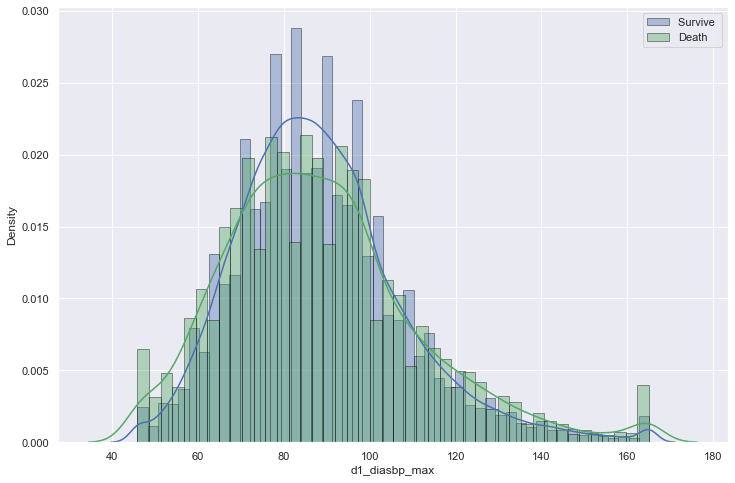

_______________________________________________________________________________
D1_DIASBP_MIN

0    37.0
1    31.0
2    48.0
3    42.0
4    57.0
Name: d1_diasbp_min, dtype: float64

Description: The patient's lowest diastolic blood pressure during the first 24 hours of their unit stay, either non-invasively or invasively measured


Number of Null values:
165

Value Counts:
50.0    3443
51.0    3065
52.0    2887
55.0    2834
53.0    2829
        ... 
87.0      89
88.0      87
14.0      87
86.0      86
89.0      78
Name: d1_diasbp_min, Length: 78, dtype: int64

count    91548.000000
mean        50.161314
std         13.317586
min         13.000000
25%         42.000000
50%         50.000000
75%         58.000000
max         90.000000
Name: d1_diasbp_min, dtype: float64



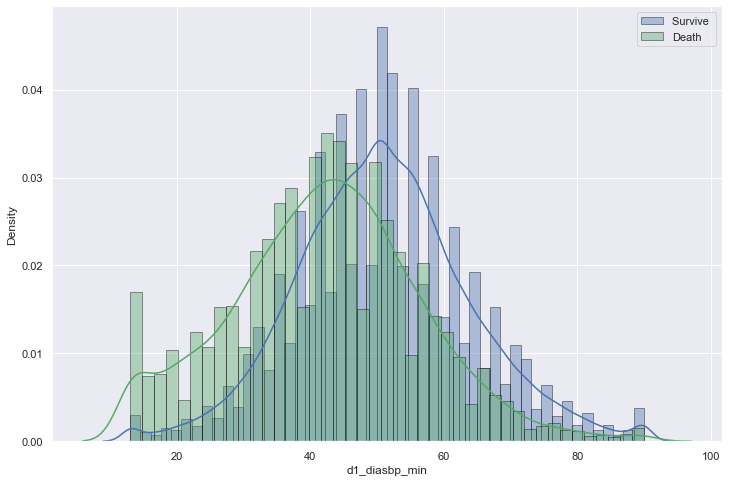

_______________________________________________________________________________
D1_DIASBP_NONINVASIVE_MAX

0    68.0
1    95.0
2    88.0
3    48.0
4    99.0
Name: d1_diasbp_noninvasive_max, dtype: float64

Description: The patient's highest diastolic blood pressure during the first 24 hours of their unit stay, non-invasively measured


Number of Null values:
1040

Value Counts:
84.0     2087
80.0     2083
88.0     2040
82.0     2026
86.0     2024
         ... 
159.0      31
157.0      30
161.0      27
163.0      24
164.0      22
Name: d1_diasbp_noninvasive_max, Length: 120, dtype: int64

count    90673.000000
mean        88.610513
std         19.793743
min         46.000000
25%         75.000000
50%         87.000000
75%         99.000000
max        165.000000
Name: d1_diasbp_noninvasive_max, dtype: float64



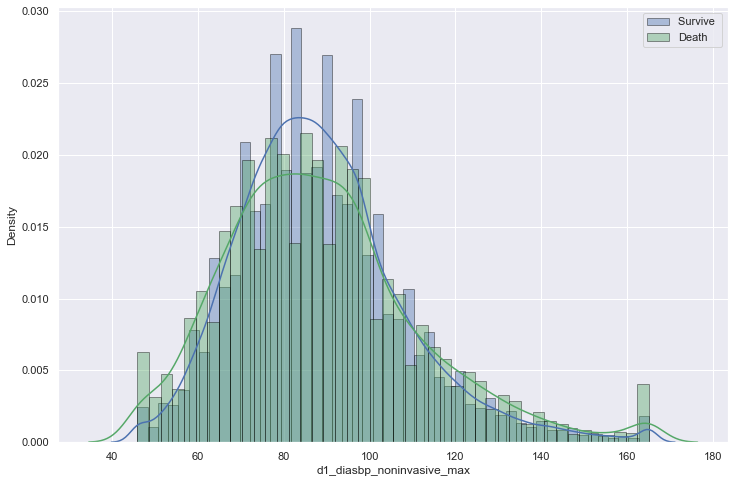

_______________________________________________________________________________
D1_DIASBP_NONINVASIVE_MIN

0    37.0
1    31.0
2    48.0
3    42.0
4    57.0
Name: d1_diasbp_noninvasive_min, dtype: float64

Description: The patient's lowest diastolic blood pressure during the first 24 hours of their unit stay, non-invasively measured


Number of Null values:
1040

Value Counts:
50.0    3407
51.0    3036
52.0    2864
55.0    2822
53.0    2817
        ... 
87.0      88
88.0      87
86.0      86
14.0      85
89.0      78
Name: d1_diasbp_noninvasive_min, Length: 78, dtype: int64

count    90673.000000
mean        50.242597
std         13.341521
min         13.000000
25%         42.000000
50%         50.000000
75%         58.000000
max         90.000000
Name: d1_diasbp_noninvasive_min, dtype: float64



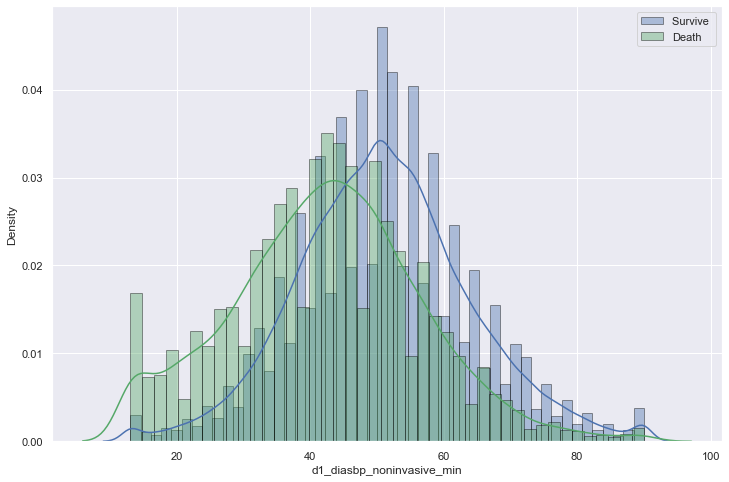

_______________________________________________________________________________
D1_HEARTRATE_MAX

0    119.0
1    118.0
2     96.0
3    116.0
4     89.0
Name: d1_heartrate_max, dtype: float64

Description: The patient's highest heart rate during the first 24 hours of their unit stay


Number of Null values:
145

Value Counts:
96.0     2012
100.0    2000
90.0     1951
92.0     1931
98.0     1931
         ... 
174.0      38
171.0      35
175.0      34
173.0      33
176.0      32
Name: d1_heartrate_max, Length: 120, dtype: int64

count    91568.000000
mean       103.000568
std         22.017346
min         58.000000
25%         87.000000
50%        101.000000
75%        116.000000
max        177.000000
Name: d1_heartrate_max, dtype: float64



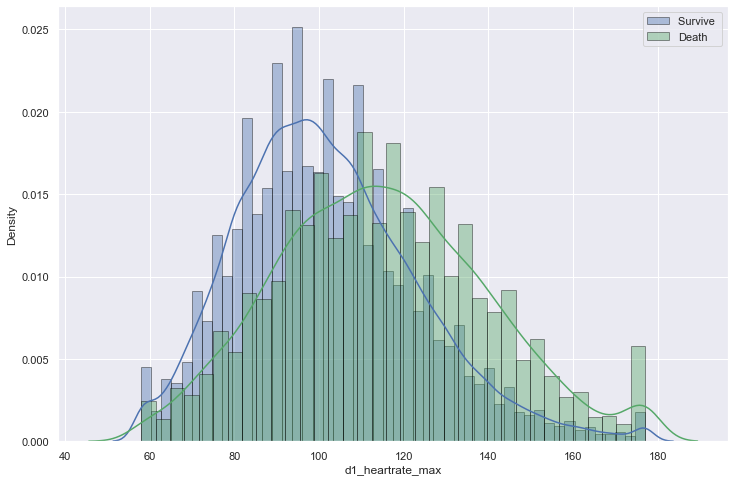

_______________________________________________________________________________
D1_HEARTRATE_MIN

0    72.0
1    72.0
2    68.0
3    92.0
4    60.0
Name: d1_heartrate_min, dtype: float64

Description: The patient's lowest heart rate during the first 24 hours of their unit stay


Number of Null values:
145

Value Counts:
60.0     3347
70.0     2983
68.0     2631
62.0     2537
66.0     2485
         ... 
160.0       1
175.0       1
141.0       1
147.0       1
155.0       1
Name: d1_heartrate_min, Length: 154, dtype: int64

count    91568.000000
mean        70.321848
std         17.115903
min          0.000000
25%         60.000000
50%         69.000000
75%         81.000000
max        175.000000
Name: d1_heartrate_min, dtype: float64



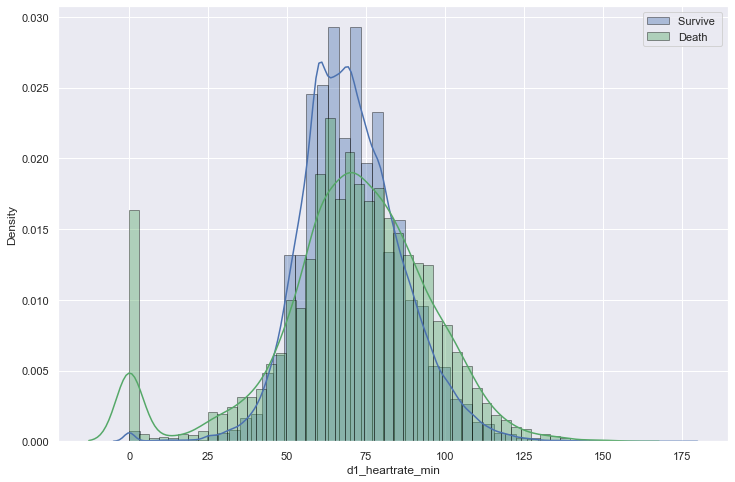

_______________________________________________________________________________
D1_MBP_MAX

0     89.0
1    120.0
2    102.0
3     84.0
4    104.0
Name: d1_mbp_max, dtype: float64

Description: The patient's highest mean blood pressure during the first 24 hours of their unit stay, either non-invasively or invasively measured


Number of Null values:
220

Value Counts:
96.0     2045
98.0     2040
100.0    2031
97.0     1989
104.0    1970
         ... 
176.0      30
177.0      27
183.0      25
179.0      24
182.0      23
Name: d1_mbp_max, Length: 125, dtype: int64

count    91493.000000
mean       104.651339
std         20.808358
min         60.000000
25%         90.000000
50%        102.000000
75%        116.000000
max        184.000000
Name: d1_mbp_max, dtype: float64



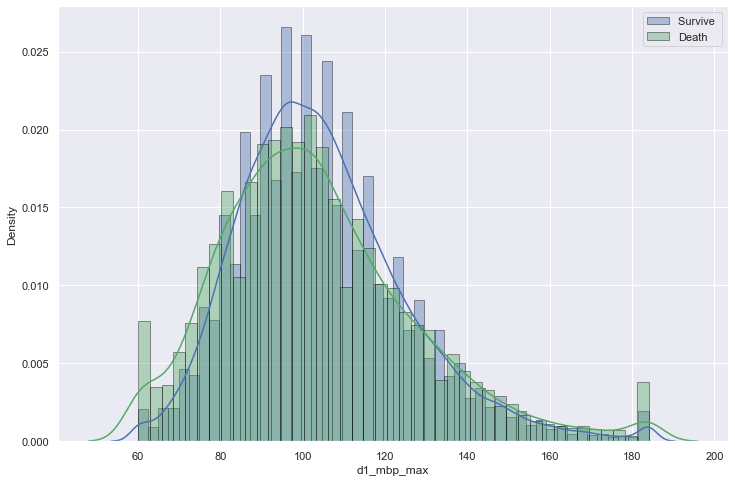

_______________________________________________________________________________
D1_MBP_MIN

0    46.0
1    38.0
2    68.0
3    84.0
4    90.0
Name: d1_mbp_min, dtype: float64

Description: The patient's lowest mean blood pressure during the first 24 hours of their unit stay, either non-invasively or invasively measured


Number of Null values:
220

Value Counts:
60.0     2649
61.0     2578
64.0     2575
62.0     2549
59.0     2548
         ... 
24.0       97
108.0      90
111.0      78
109.0      75
110.0      72
Name: d1_mbp_min, Length: 91, dtype: int64

count    91493.000000
mean        64.871859
std         15.679680
min         22.000000
25%         55.000000
50%         64.000000
75%         75.000000
max        112.000000
Name: d1_mbp_min, dtype: float64



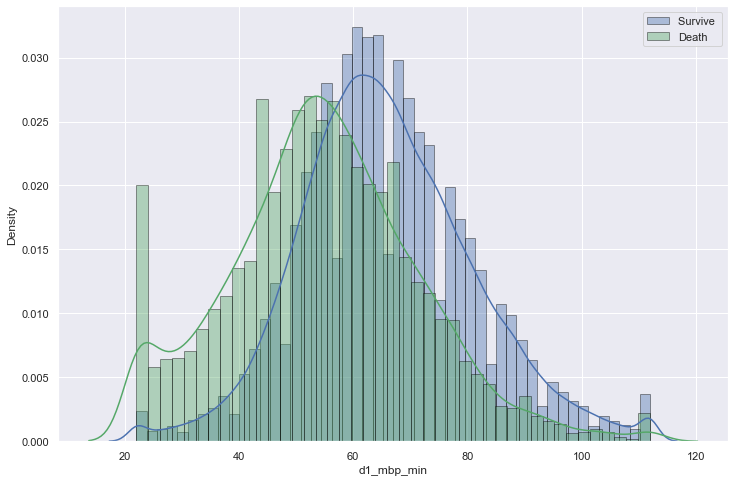

_______________________________________________________________________________
D1_MBP_NONINVASIVE_MAX

0     89.0
1    120.0
2    102.0
3     84.0
4    104.0
Name: d1_mbp_noninvasive_max, dtype: float64

Description: The patient's highest mean blood pressure during the first 24 hours of their unit stay, non-invasively measured


Number of Null values:
1479

Value Counts:
96.0     2008
98.0     1994
100.0    1983
97.0     1963
103.0    1953
         ... 
178.0      33
180.0      30
176.0      30
177.0      26
179.0      23
Name: d1_mbp_noninvasive_max, Length: 122, dtype: int64

count    90234.000000
mean       104.590454
std         20.701171
min         60.000000
25%         90.000000
50%        102.000000
75%        116.000000
max        181.000000
Name: d1_mbp_noninvasive_max, dtype: float64



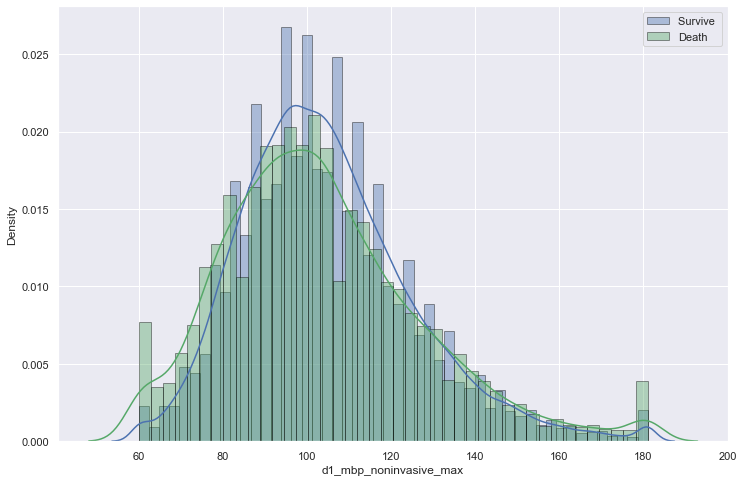

_______________________________________________________________________________
D1_MBP_NONINVASIVE_MIN

0    46.0
1    38.0
2    68.0
3    84.0
4    90.0
Name: d1_mbp_noninvasive_min, dtype: float64

Description: The patient's lowest mean blood pressure during the first 24 hours of their unit stay, non-invasively measured


Number of Null values:
1479

Value Counts:
60.0     2562
61.0     2540
64.0     2513
63.0     2511
59.0     2500
         ... 
24.0       98
108.0      92
111.0      77
109.0      74
110.0      68
Name: d1_mbp_noninvasive_min, Length: 91, dtype: int64

count    90234.000000
mean        64.941541
std         15.701305
min         22.000000
25%         55.000000
50%         64.000000
75%         75.000000
max        112.000000
Name: d1_mbp_noninvasive_min, dtype: float64



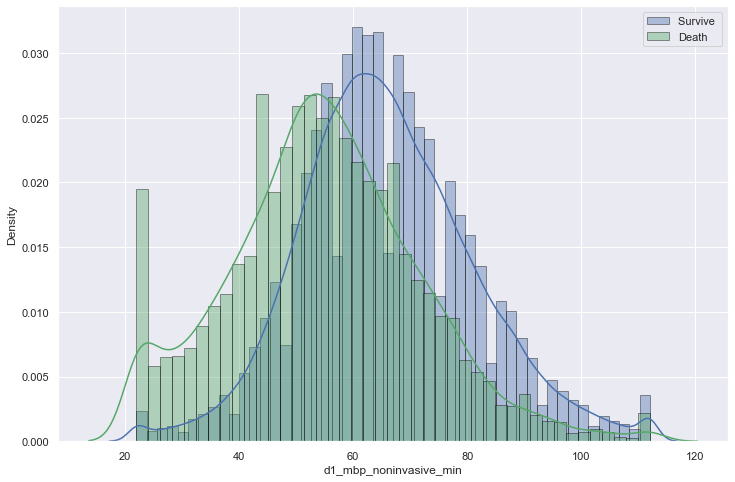

_______________________________________________________________________________
D1_RESPRATE_MAX

0    34.0
1    32.0
2    21.0
3    23.0
4    18.0
Name: d1_resprate_max, dtype: float64

Description: The patient's highest respiratory rate during the first 24 hours of their unit stay


Number of Null values:
385

Value Counts:
24.0    6273
22.0    5631
20.0    5469
25.0    5330
26.0    5280
        ... 
82.0      22
91.0      22
90.0      19
87.0      15
89.0      13
Name: d1_resprate_max, Length: 79, dtype: int64

count    91328.000000
mean        28.882774
std         10.701973
min         14.000000
25%         22.000000
50%         26.000000
75%         32.000000
max         92.000000
Name: d1_resprate_max, dtype: float64



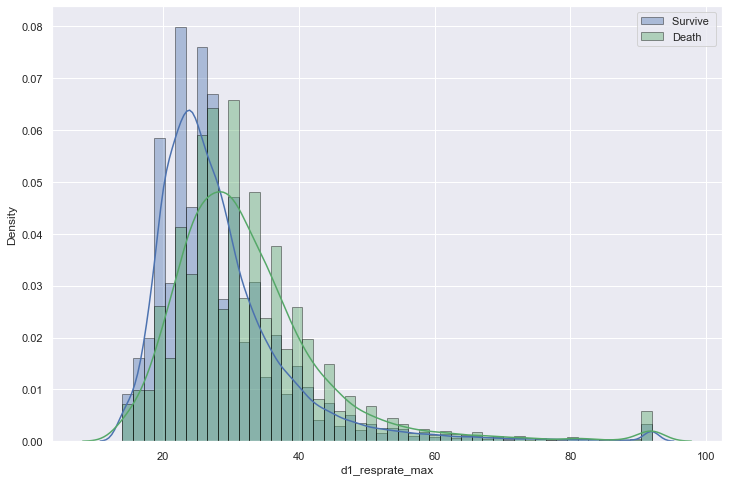

_______________________________________________________________________________
D1_RESPRATE_MIN

0    10.0
1    12.0
2     8.0
3     7.0
4    16.0
Name: d1_resprate_min, dtype: float64

Description: The patient's lowest respiratory rate during the first 24 hours of their unit stay


Number of Null values:
385

Value Counts:
12.0     10962
14.0      9142
16.0      7711
13.0      7612
10.0      7423
11.0      7385
15.0      6586
9.0       4508
18.0      4168
17.0      3763
0.0       3673
8.0       3628
20.0      2296
7.0       2105
19.0      2046
6.0       1413
22.0      1001
21.0       998
5.0        813
23.0       653
4.0        598
24.0       576
25.0       344
3.0        332
2.0        291
26.0       288
1.0        220
28.0       169
27.0       162
29.0       113
30.0        94
32.0        50
33.0        40
31.0        39
35.0        27
36.0        19
34.0        17
37.0        10
40.0         9
39.0         8
41.0         5
42.0         5
38.0         5
44.0         5
58.0         2

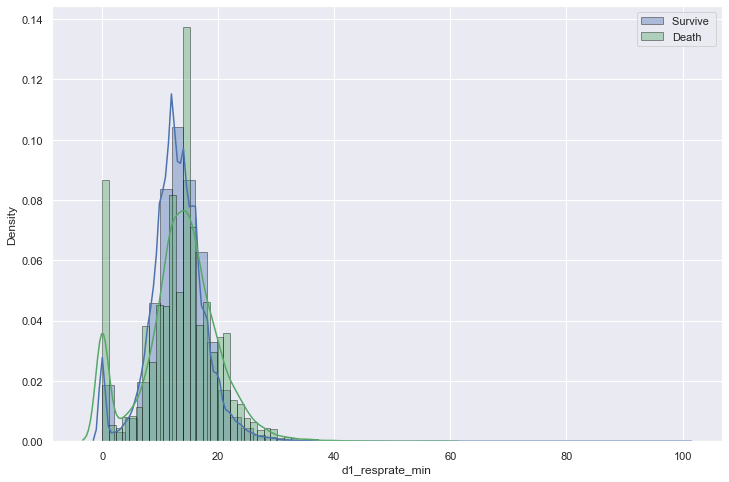

_______________________________________________________________________________
D1_SPO2_MAX

0    100.0
1    100.0
2     98.0
3    100.0
4    100.0
Name: d1_spo2_max, dtype: float64

Description: The patient's highest peripheral oxygen saturation during the first 24 hours of their unit stay


Number of Null values:
333

Value Counts:
100.0    60426
99.0     13118
98.0      8574
97.0      4628
96.0      2478
95.0      1075
94.0       486
93.0       236
92.0       128
91.0        50
90.0        37
89.0        25
88.0        18
87.0        11
82.0         8
84.0         8
83.0         7
0.0          6
80.0         6
77.0         6
86.0         6
76.0         4
85.0         4
78.0         4
81.0         3
67.0         3
64.0         3
75.0         2
56.0         2
70.0         2
73.0         2
16.0         2
74.0         2
71.0         1
13.0         1
31.0         1
40.0         1
68.0         1
62.0         1
79.0         1
26.0         1
65.0         1
60.0         1
Name: d1_spo2_max, 

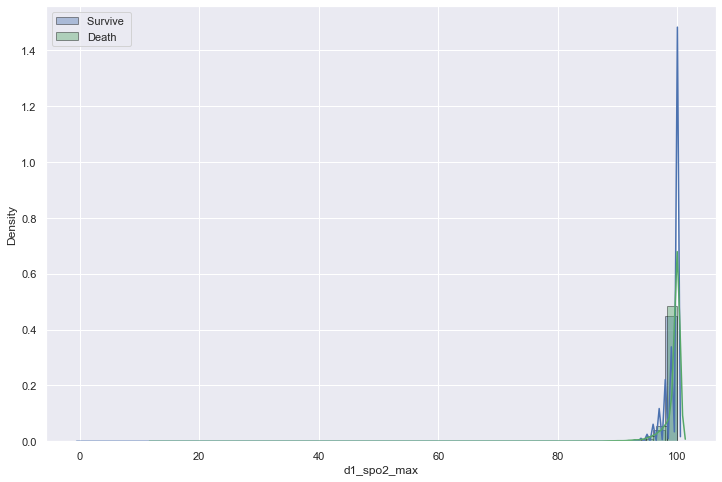

_______________________________________________________________________________
D1_SPO2_MIN

0    74.0
1    70.0
2    91.0
3    95.0
4    96.0
Name: d1_spo2_min, dtype: float64

Description: The patient's lowest peripheral oxygen saturation during the first 24 hours of their unit stay


Number of Null values:
333

Value Counts:
94.0    8744
92.0    8707
93.0    8661
95.0    7991
91.0    7243
        ... 
29.0      10
19.0      10
11.0       8
13.0       7
7.0        7
Name: d1_spo2_min, Length: 101, dtype: int64

count    91380.000000
mean        90.454826
std         10.030069
min          0.000000
25%         89.000000
50%         92.000000
75%         95.000000
max        100.000000
Name: d1_spo2_min, dtype: float64



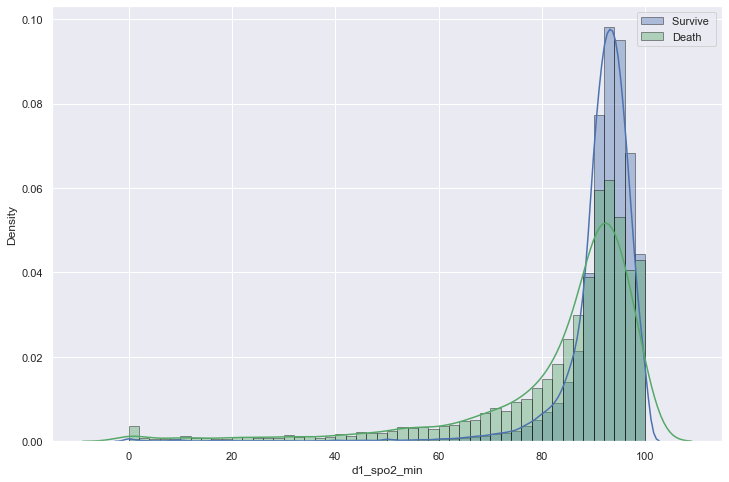

_______________________________________________________________________________
D1_SYSBP_MAX

0    131.0
1    159.0
2    148.0
3    158.0
4    147.0
Name: d1_sysbp_max, dtype: float64

Description: The patient's highest systolic blood pressure :uring the first 24 hours of their unit stay, either non-invasively or invasively measured


Number of Null values:
159

Value Counts:
140.0    1610
135.0    1512
146.0    1490
134.0    1484
144.0    1481
         ... 
230.0      40
228.0      38
227.0      30
229.0      25
231.0      24
Name: d1_sysbp_max, Length: 143, dtype: int64

count    91554.000000
mean       148.339745
std         25.733259
min         90.000000
25%        130.000000
50%        146.000000
75%        164.000000
max        232.000000
Name: d1_sysbp_max, dtype: float64



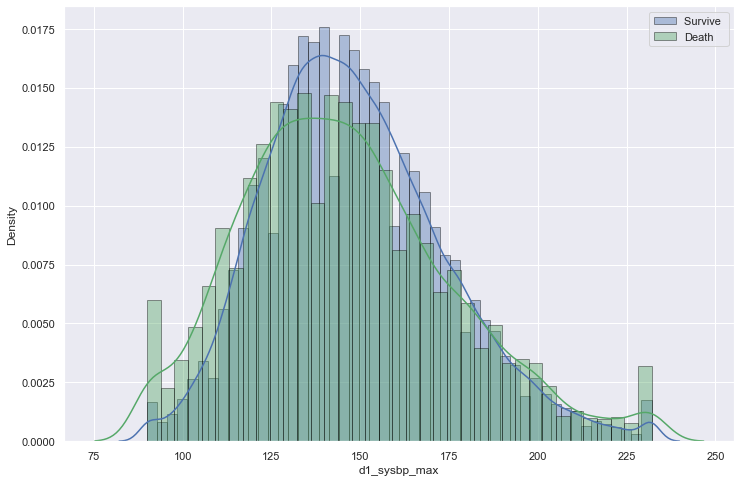

_______________________________________________________________________________
D1_SYSBP_MIN

0     73.0
1     67.0
2    105.0
3     84.0
4    120.0
Name: d1_sysbp_min, dtype: float64

Description: The patient's lowest systolic blood pressure :uring the first 24 hours of their unit stay, either non-invasively or invasively measured


Number of Null values:
159

Value Counts:
90.0     2177
91.0     2136
92.0     2095
93.0     1990
94.0     1987
         ... 
156.0      57
158.0      54
42.0       45
157.0      41
159.0      40
Name: d1_sysbp_min, Length: 120, dtype: int64

count    91554.00000
mean        96.92387
std         20.67793
min         41.00000
25%         83.00000
50%         96.00000
75%        110.00000
max        160.00000
Name: d1_sysbp_min, dtype: float64



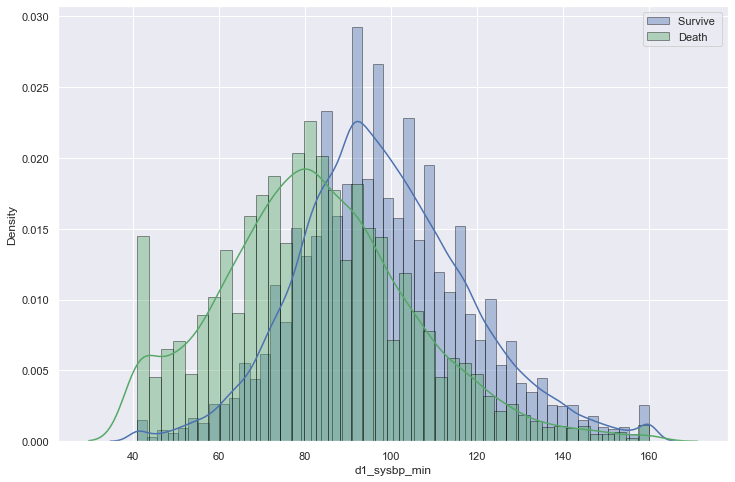

_______________________________________________________________________________
D1_SYSBP_NONINVASIVE_MAX

0    131.0
1    159.0
2    148.0
3    158.0
4    147.0
Name: d1_sysbp_noninvasive_max, dtype: float64

Description: The patient': highest systolic blood pressure during the first 24 hours of their unit stay, invasively measured


Number of Null values:
1027

Value Counts:
140.0    1576
135.0    1502
146.0    1476
139.0    1468
144.0    1462
         ... 
230.0      39
228.0      38
227.0      30
229.0      24
231.0      24
Name: d1_sysbp_noninvasive_max, Length: 143, dtype: int64

count    90686.000000
mean       148.235549
std         25.792453
min         90.000000
25%        130.000000
50%        146.000000
75%        164.000000
max        232.000000
Name: d1_sysbp_noninvasive_max, dtype: float64



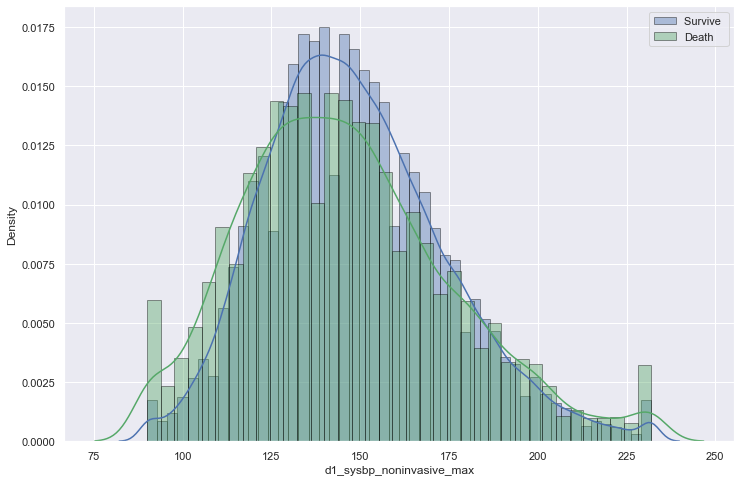

_______________________________________________________________________________
D1_SYSBP_NONINVASIVE_MIN

0     73.0
1     67.0
2    105.0
3     84.0
4    120.0
Name: d1_sysbp_noninvasive_min, dtype: float64

Description: The patient': lowest systolic blood pressure during the first 24 hours of their unit stay, invasively measured


Number of Null values:
1027

Value Counts:
90.0     2146
91.0     2119
92.0     2061
93.0     1967
94.0     1965
         ... 
156.0      57
158.0      53
42.0       46
159.0      40
157.0      40
Name: d1_sysbp_noninvasive_min, Length: 120, dtype: int64

count    90686.000000
mean        96.993313
std         20.705016
min         41.030000
25%         84.000000
50%         96.000000
75%        110.000000
max        160.000000
Name: d1_sysbp_noninvasive_min, dtype: float64



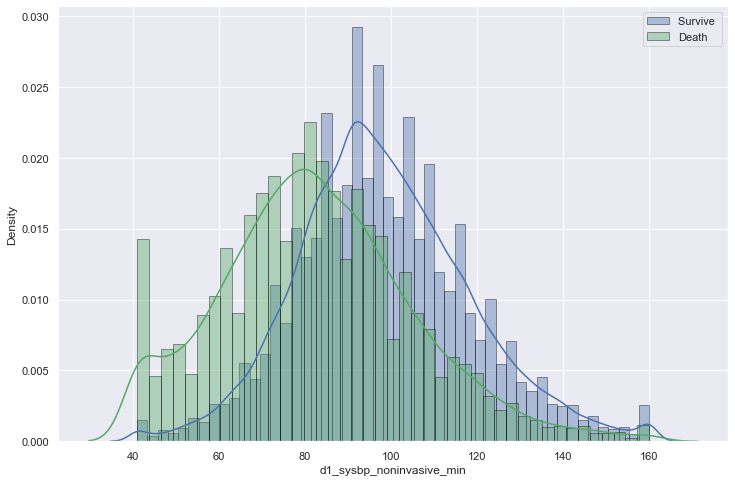

_______________________________________________________________________________
D1_TEMP_MAX

0    39.9
1    36.3
2    37.0
3    38.0
4    37.2
Name: d1_temp_max, dtype: float64

Description: The patient:s highest core temperature during the first 24 hours of their unit stay, invasively measured


Number of Null values:
2324

Value Counts:
37.100    8075
36.900    7563
36.800    6984
37.200    6951
37.000    6197
          ... 
38.389       1
35.111       1
37.333       1
38.333       1
39.830       1
Name: d1_temp_max, Length: 186, dtype: int64

count    89389.000000
mean        37.284201
std          0.693287
min         35.100000
25%         36.900000
50%         37.110000
75%         37.600000
max         39.900000
Name: d1_temp_max, dtype: float64



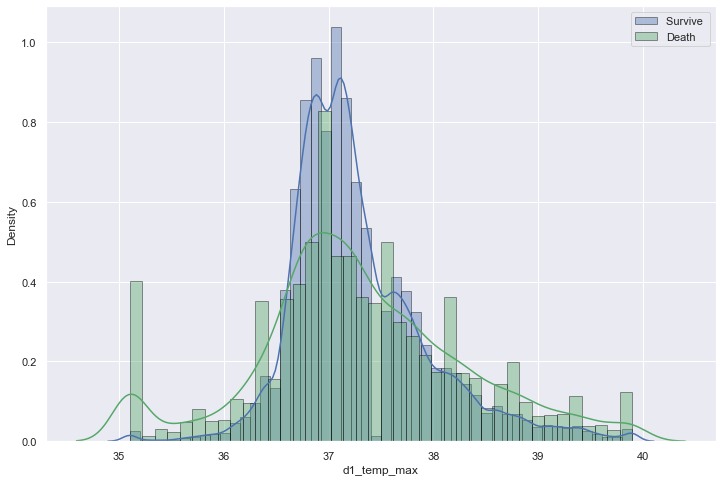

_______________________________________________________________________________
D1_TEMP_MIN

0    37.2
1    35.1
2    36.7
3    34.8
4    36.7
Name: d1_temp_min, dtype: float64

Description: The patient's lowest core temperature during the first 24 hours of their unit stay


Number of Null values:
2324

Value Counts:
36.400    10559
36.600     8585
36.300     7942
36.700     7341
36.500     6486
          ...  
33.050        1
35.222        1
32.306        1
33.722        1
32.450        1
Name: d1_temp_min, Length: 209, dtype: int64

count    89389.000000
mean        36.268391
std          0.745147
min         31.889000
25%         36.100000
50%         36.400000
75%         36.660000
max         37.800000
Name: d1_temp_min, dtype: float64



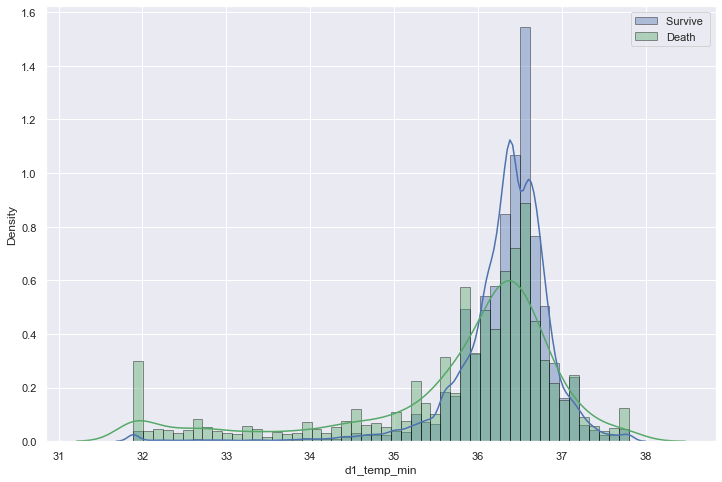

_______________________________________________________________________________
H1_DIASBP_MAX

0    68.0
1    61.0
2    88.0
3    62.0
4    99.0
Name: h1_diasbp_max, dtype: float64

Description: The patient's highest diastolic blood :ressure during the first hour of their unit stay, either non-invasively or invasively measured


Number of Null values:
3619

Value Counts:
68.0     2132
74.0     2123
70.0     2096
72.0     2036
66.0     2016
         ... 
139.0      35
138.0      33
140.0      29
141.0      29
142.0      28
Name: h1_diasbp_max, Length: 107, dtype: int64

count    88094.000000
mean        75.354508
std         18.409190
min         37.000000
25%         62.000000
50%         74.000000
75%         86.000000
max        143.000000
Name: h1_diasbp_max, dtype: float64



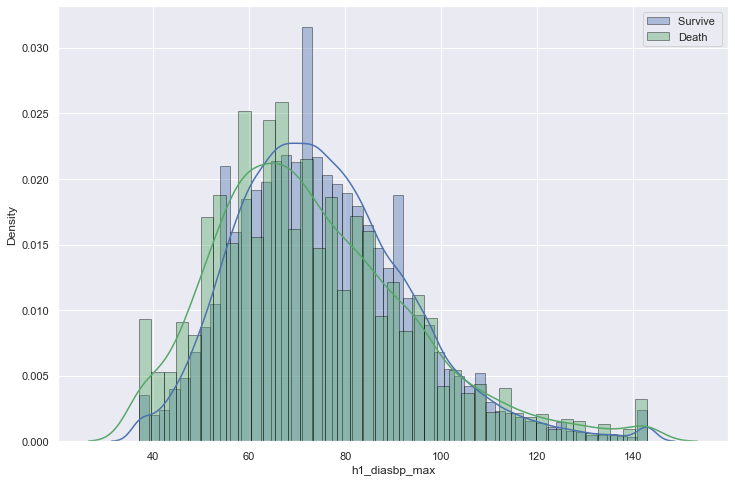

_______________________________________________________________________________
H1_DIASBP_MIN

0    63.0
1    48.0
2    58.0
3    44.0
4    68.0
Name: h1_diasbp_min, dtype: float64

Description: The patient's lowest diastolic blood :ressure during the first hour of their unit stay, either non-invasively or invasively measured


Number of Null values:
3619

Value Counts:
58.0     2404
60.0     2401
55.0     2319
56.0     2296
59.0     2240
         ... 
107.0      73
23.0       70
111.0      59
109.0      57
112.0      55
Name: h1_diasbp_min, Length: 92, dtype: int64

count    88094.000000
mean        62.838150
std         16.363229
min         22.000000
25%         52.000000
50%         62.000000
75%         73.000000
max        113.000000
Name: h1_diasbp_min, dtype: float64



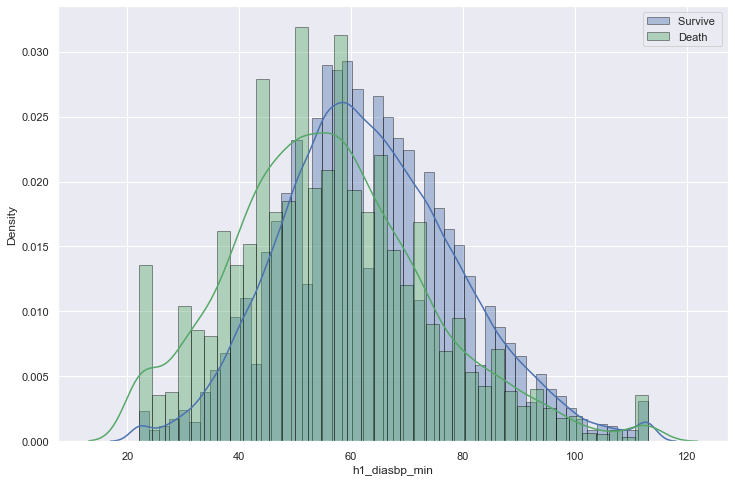

_______________________________________________________________________________
H1_DIASBP_NONINVASIVE_MAX

0    68.0
1    61.0
2    88.0
3     NaN
4    99.0
Name: h1_diasbp_noninvasive_max, dtype: float64

Description: The patient:s highest diastolic blood pressure during the first hour of their unit stay, invasively measured


Number of Null values:
7350

Value Counts:
74.0     2021
68.0     2009
70.0     1981
72.0     1922
65.0     1872
         ... 
139.0      35
138.0      33
140.0      29
141.0      29
142.0      28
Name: h1_diasbp_noninvasive_max, Length: 108, dtype: int64

count    84363.000000
mean        75.805934
std         18.481826
min         37.000000
25%         63.000000
50%         74.000000
75%         87.000000
max        144.000000
Name: h1_diasbp_noninvasive_max, dtype: float64



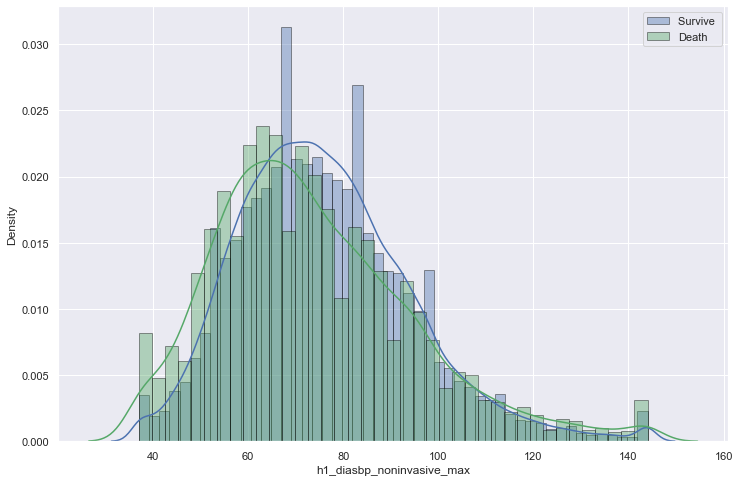

_______________________________________________________________________________
H1_DIASBP_NONINVASIVE_MIN

0    63.0
1    48.0
2    58.0
3     NaN
4    68.0
Name: h1_diasbp_noninvasive_min, dtype: float64

Description: The patient:s lowest diastolic blood pressure during the first hour of their unit stay, invasively measured


Number of Null values:
7350

Value Counts:
60.0     2291
58.0     2265
55.0     2209
56.0     2175
59.0     2169
         ... 
23.0       69
111.0      59
109.0      57
112.0      56
113.0      38
Name: h1_diasbp_noninvasive_min, Length: 93, dtype: int64

count    84363.000000
mean        63.270616
std         16.422063
min         22.000000
25%         52.000000
50%         62.000000
75%         74.000000
max        114.000000
Name: h1_diasbp_noninvasive_min, dtype: float64



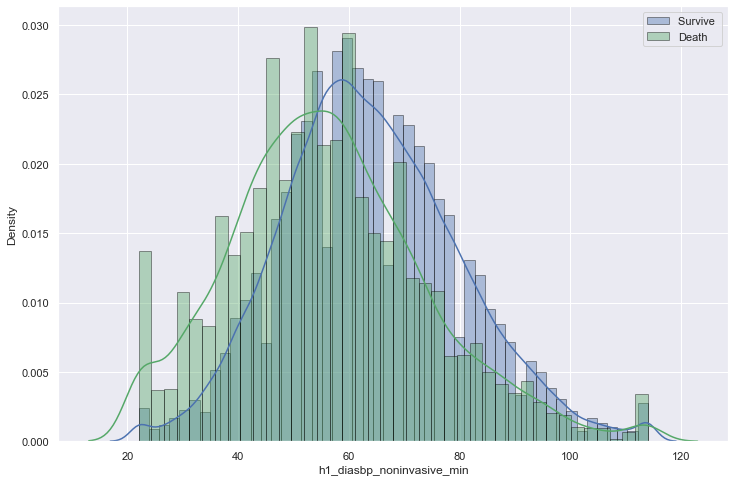

_______________________________________________________________________________
H1_HEARTRATE_MAX

0    119.0
1    114.0
2     96.0
3    100.0
4     89.0
Name: h1_heartrate_max, dtype: float64

Description: The patient's highest heart rate during the first hour of their unit stay


Number of Null values:
2790

Value Counts:
80.0     2305
90.0     1929
88.0     1895
86.0     1876
84.0     1851
         ... 
162.0      46
161.0      40
157.0      39
159.0      39
163.0      37
Name: h1_heartrate_max, Length: 119, dtype: int64

count    88923.000000
mean        92.229198
std         21.823704
min         46.000000
25%         77.000000
50%         90.000000
75%        106.000000
max        164.000000
Name: h1_heartrate_max, dtype: float64



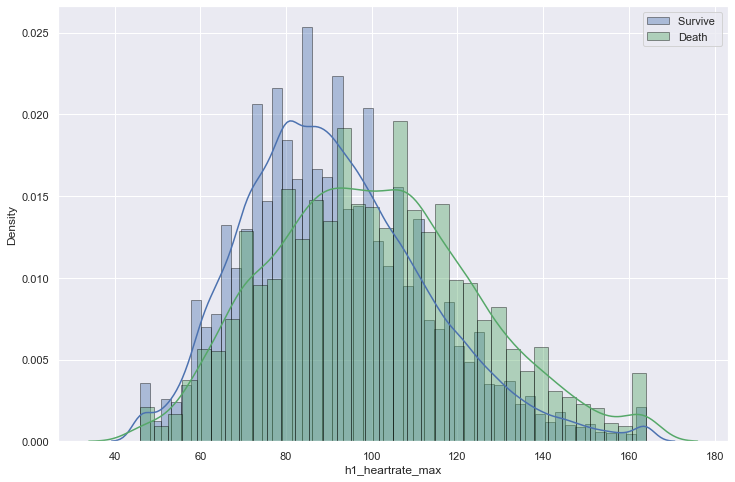

_______________________________________________________________________________
H1_HEARTRATE_MIN

0    108.0
1    100.0
2     78.0
3     96.0
4     76.0
Name: h1_heartrate_min, dtype: float64

Description: The patient's lowest heart rate during the first hour of their unit stay


Number of Null values:
2790

Value Counts:
80.0     2485
70.0     2127
84.0     1914
74.0     1882
78.0     1875
         ... 
142.0      61
39.0       60
37.0       58
141.0      51
143.0      41
Name: h1_heartrate_min, Length: 109, dtype: int64

count    88923.000000
mean        83.663720
std         20.279869
min         36.000000
25%         69.000000
50%         82.000000
75%         97.000000
max        144.000000
Name: h1_heartrate_min, dtype: float64



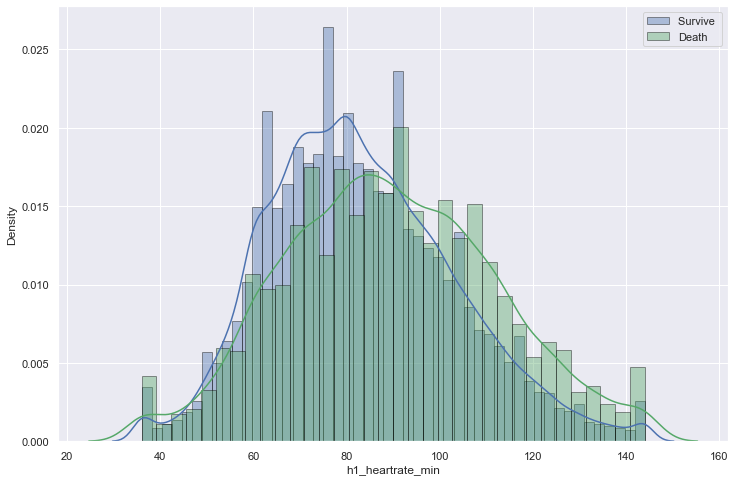

_______________________________________________________________________________
H1_MBP_MAX

0     86.0
1     85.0
2     91.0
3     92.0
4    104.0
Name: h1_mbp_max, dtype: float64

Description: The patient's highest mean blood :ressure during the first hour of their unit stay, either non-invasively or invasively measured


Number of Null values:
4639

Value Counts:
88.0     1859
86.0     1789
85.0     1785
87.0     1758
90.0     1753
         ... 
163.0      34
156.0      33
160.0      26
162.0      22
164.0      21
Name: h1_mbp_max, Length: 117, dtype: int64

count    87074.000000
mean        91.612950
std         20.533174
min         49.000000
25%         77.000000
50%         90.000000
75%        104.000000
max        165.000000
Name: h1_mbp_max, dtype: float64



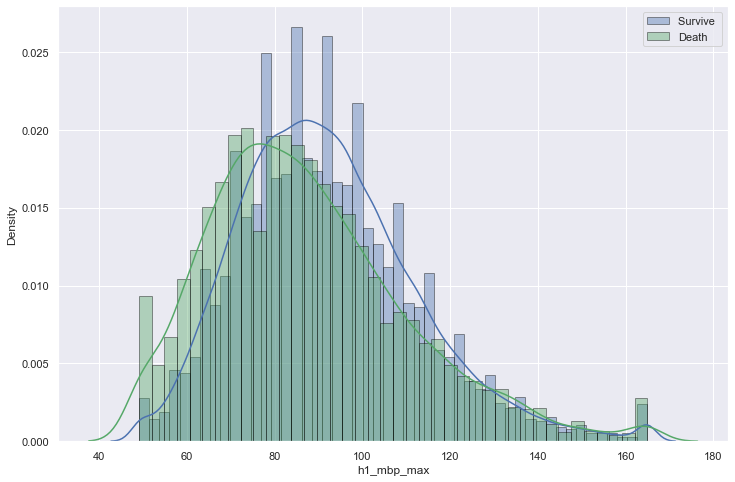

_______________________________________________________________________________
H1_MBP_MIN

0    85.0
1    57.0
2    83.0
3    71.0
4    92.0
Name: h1_mbp_min, dtype: float64

Description: The patient's lowest mean blood :ressure during the first hour of their unit stay, either non-invasively or invasively measured


Number of Null values:
4639

Value Counts:
80.0     1976
74.0     1945
73.0     1882
78.0     1856
76.0     1855
         ... 
134.0      56
33.0       55
136.0      54
133.0      47
137.0      46
Name: h1_mbp_min, Length: 107, dtype: int64

count    87074.000000
mean        79.400028
std         19.130590
min         32.000000
25%         66.000000
50%         78.000000
75%         92.000000
max        138.000000
Name: h1_mbp_min, dtype: float64



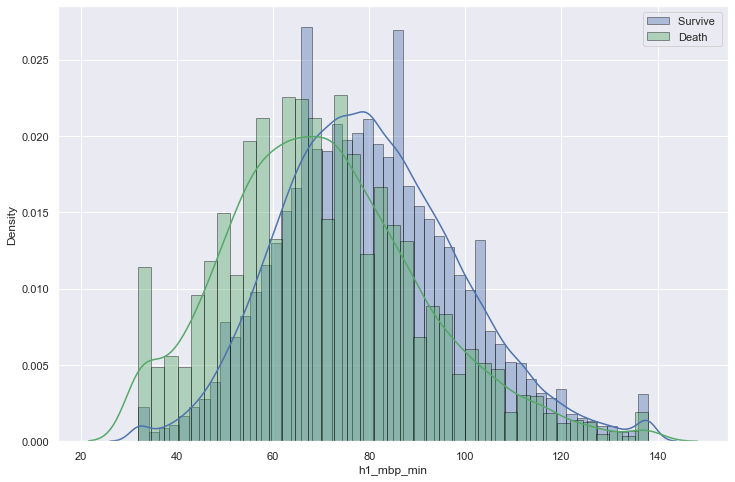

_______________________________________________________________________________
H1_MBP_NONINVASIVE_MAX

0     86.0
1     85.0
2     91.0
3      NaN
4    104.0
Name: h1_mbp_noninvasive_max, dtype: float64

Description: The patient's :ighest mean blood pressure during the first hour of their unit stay, non-invasively measured


Number of Null values:
9084

Value Counts:
88.0     1740
85.0     1707
86.0     1670
87.0     1664
79.0     1647
         ... 
157.0      35
159.0      35
156.0      31
160.0      26
162.0      22
Name: h1_mbp_noninvasive_max, Length: 115, dtype: int64

count    82629.000000
mean        91.594126
std         20.552018
min         49.000000
25%         77.000000
50%         90.000000
75%        104.000000
max        163.000000
Name: h1_mbp_noninvasive_max, dtype: float64



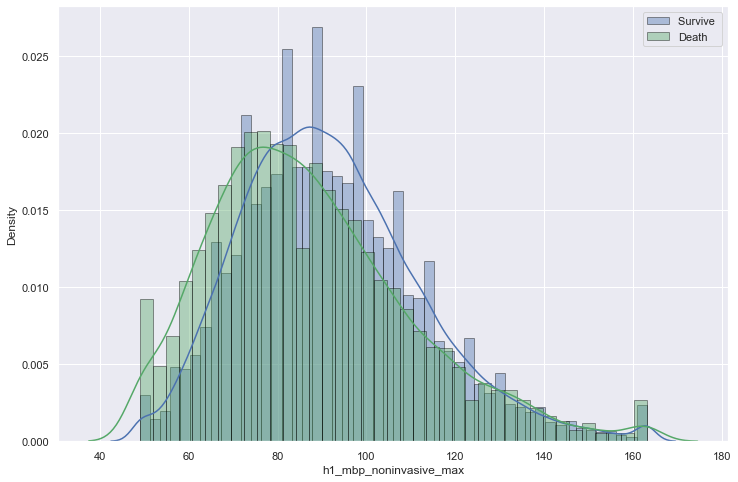

_______________________________________________________________________________
H1_MBP_NONINVASIVE_MIN

0    85.0
1    57.0
2    83.0
3     NaN
4    92.0
Name: h1_mbp_noninvasive_min, dtype: float64

Description: The patient's :owest mean blood pressure during the first hour of their unit stay, non-invasively measured


Number of Null values:
9084

Value Counts:
80.0     1864
74.0     1791
73.0     1786
79.0     1750
78.0     1740
         ... 
134.0      56
136.0      54
33.0       52
133.0      47
137.0      45
Name: h1_mbp_noninvasive_min, Length: 107, dtype: int64

count    82629.000000
mean        79.709315
std         19.236507
min         32.000000
25%         66.000000
50%         79.000000
75%         92.000000
max        138.000000
Name: h1_mbp_noninvasive_min, dtype: float64



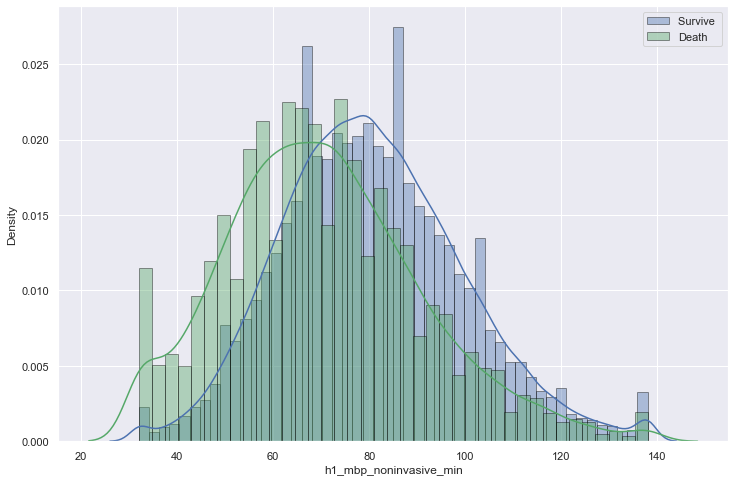

_______________________________________________________________________________
H1_RESPRATE_MAX

0    26.0
1    31.0
2    20.0
3    12.0
4     NaN
Name: h1_resprate_max, dtype: float64

Description: The patient's highest respiratory rate during the first hour of their unit stay


Number of Null values:
4357

Value Counts:
20.0    7998
18.0    7312
16.0    5684
22.0    5563
21.0    5185
19.0    5103
24.0    4756
23.0    4283
17.0    4267
25.0    3513
26.0    3321
15.0    3131
14.0    2986
28.0    2787
27.0    2564
30.0    2021
29.0    1927
12.0    1695
32.0    1417
13.0    1313
31.0    1276
33.0    1071
34.0     923
35.0     796
10.0     785
36.0     719
37.0     552
38.0     533
40.0     495
59.0     442
39.0     434
11.0     421
41.0     317
42.0     288
43.0     204
44.0     195
45.0     163
46.0     157
47.0     123
48.0     110
49.0      82
50.0      75
51.0      64
52.0      55
55.0      48
54.0      47
53.0      44
56.0      41
57.0      37
58.0      33
Name: h1_resprate_max, dty

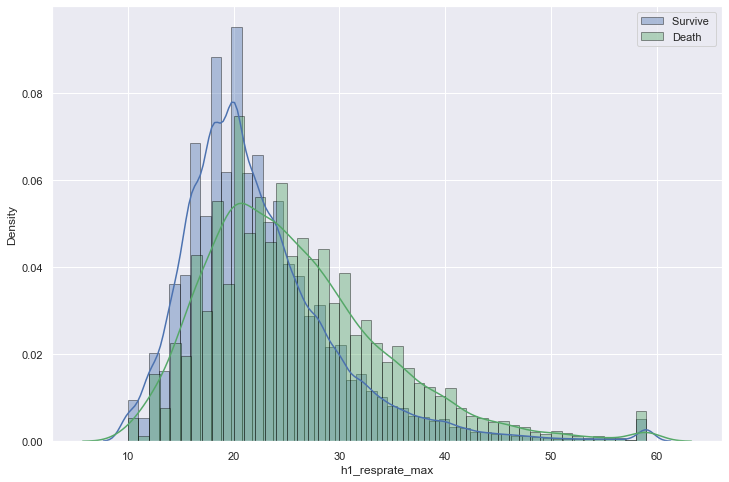

_______________________________________________________________________________
H1_RESPRATE_MIN

0    18.0
1    28.0
2    16.0
3    11.0
4     NaN
Name: h1_resprate_min, dtype: float64

Description: The patient's lowest respiratory rate during the first hour of their unit stay


Number of Null values:
4357

Value Counts:
16.0    9093
14.0    7855
18.0    7461
12.0    6724
15.0    6511
        ... 
53.0       1
56.0       1
98.0       1
68.0       1
75.0       1
Name: h1_resprate_min, Length: 91, dtype: int64

count    87356.000000
mean        17.211525
std          6.072588
min          0.000000
25%         14.000000
50%         16.000000
75%         20.000000
max        189.000000
Name: h1_resprate_min, dtype: float64



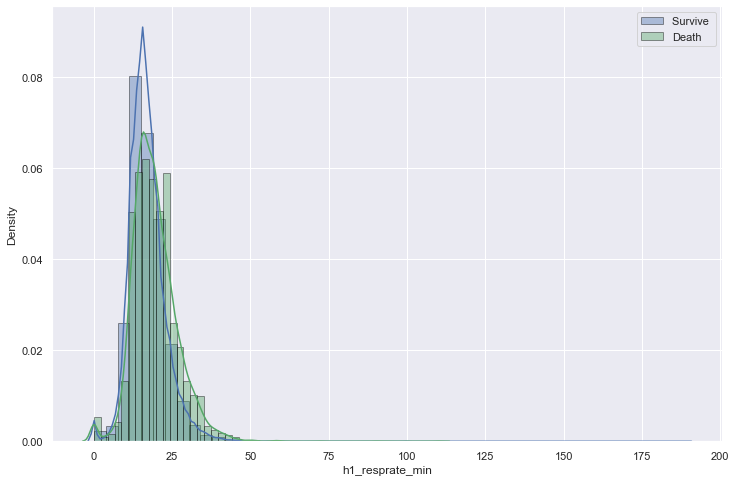

_______________________________________________________________________________
H1_SPO2_MAX

0    100.0
1     95.0
2     98.0
3    100.0
4    100.0
Name: h1_spo2_max, dtype: float64

Description: The patient's highest peripheral oxygen saturation during the first hour of their unit stay


Number of Null values:
4185

Value Counts:
100.0    36146
99.0     12848
98.0     11409
97.0      9085
96.0      6697
         ...  
13.0         1
56.0         1
58.0         1
19.0         1
29.0         1
Name: h1_spo2_max, Length: 72, dtype: int64

count    87528.000000
mean        98.044637
std          3.212934
min          0.000000
25%         97.000000
50%         99.000000
75%        100.000000
max        100.000000
Name: h1_spo2_max, dtype: float64



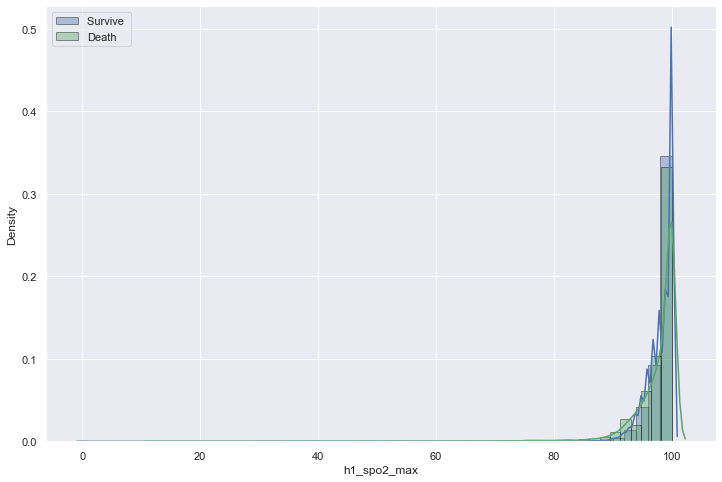

_______________________________________________________________________________
H1_SPO2_MIN

0     74.0
1     70.0
2     91.0
3     99.0
4    100.0
Name: h1_spo2_min, dtype: float64

Description: The patient's lowest peripheral oxygen saturation during the first hour of their unit stay


Number of Null values:
4185

Value Counts:
100.0    14357
97.0      9787
98.0      9728
96.0      9373
99.0      8745
         ...  
19.0         2
13.0         1
11.0         1
34.0         1
36.0         1
Name: h1_spo2_min, Length: 100, dtype: int64

count    87528.000000
mean        95.174310
std          6.625227
min          0.000000
25%         94.000000
50%         96.000000
75%         99.000000
max        100.000000
Name: h1_spo2_min, dtype: float64



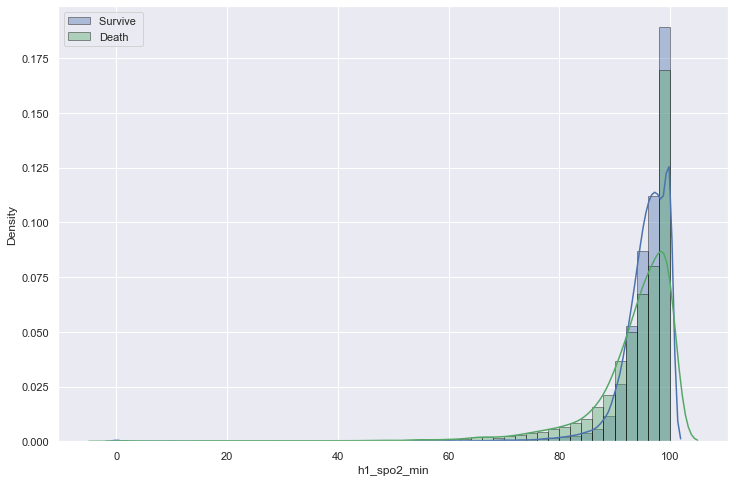

_______________________________________________________________________________
H1_SYSBP_MAX

0    131.0
1     95.0
2    148.0
3    136.0
4    130.0
Name: h1_sysbp_max, dtype: float64

Description: The patient's highest systolic blood pressure during the first hour of their unit stay, either non-invasively or invasively measured


Number of Null values:
3611

Value Counts:
124.0    1358
118.0    1357
122.0    1326
125.0    1320
128.0    1303
         ... 
220.0      37
216.0      37
213.0      33
221.0      28
218.0      25
Name: h1_sysbp_max, Length: 149, dtype: int64

count    88102.000000
mean       133.247395
std         27.556986
min         75.000000
25%        113.000000
50%        131.000000
75%        150.000000
max        223.000000
Name: h1_sysbp_max, dtype: float64



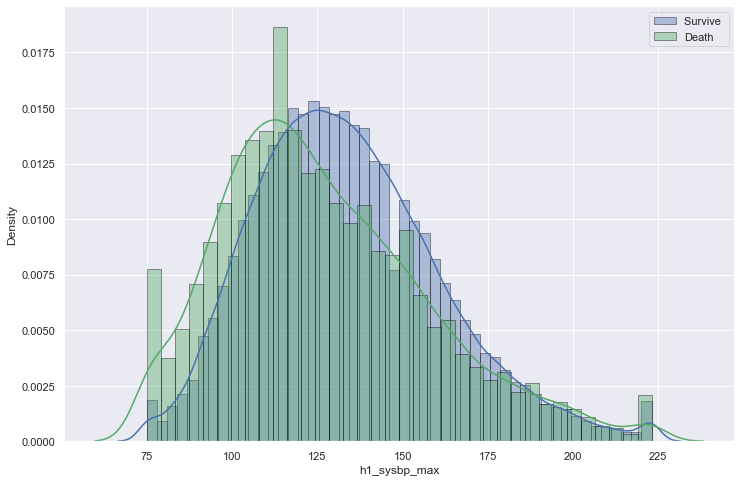

_______________________________________________________________________________
H1_SYSBP_MIN

0    115.0
1     71.0
2    124.0
3    106.0
4    120.0
Name: h1_sysbp_min, dtype: float64

Description: The patient's lowest systolic blood pressure during the first hour of their unit stay, either non-invasively or invasively measured


Number of Null values:
3611

Value Counts:
110.0    1422
106.0    1393
112.0    1365
118.0    1363
115.0    1354
         ... 
190.0      58
54.0       57
191.0      43
192.0      41
193.0      25
Name: h1_sysbp_min, Length: 142, dtype: int64

count    88102.000000
mean       116.362296
std         26.510637
min         53.000000
25%         98.000000
50%        115.000000
75%        134.000000
max        194.000000
Name: h1_sysbp_min, dtype: float64



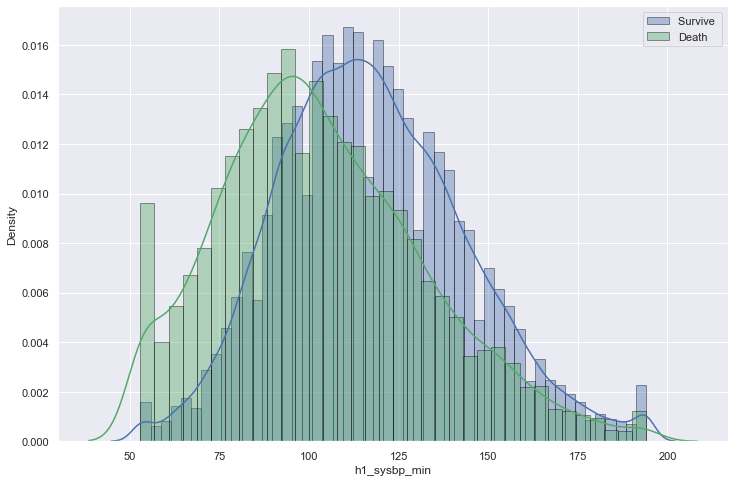

_______________________________________________________________________________
H1_SYSBP_NONINVASIVE_MAX

0    131.0
1     95.0
2    148.0
3      NaN
4    130.0
Name: h1_sysbp_noninvasive_max, dtype: float64

Description: The patient's highest systolic blood pressure during the first hour of their unit stay, non-invasively measured


Number of Null values:
7341

Value Counts:
118.0    1287
119.0    1270
124.0    1265
125.0    1254
122.0    1253
         ... 
216.0      37
220.0      35
213.0      29
221.0      26
218.0      23
Name: h1_sysbp_noninvasive_max, Length: 149, dtype: int64

count    84372.000000
mean       133.054686
std         27.679751
min         75.000000
25%        113.000000
50%        130.000000
75%        150.000000
max        223.000000
Name: h1_sysbp_noninvasive_max, dtype: float64



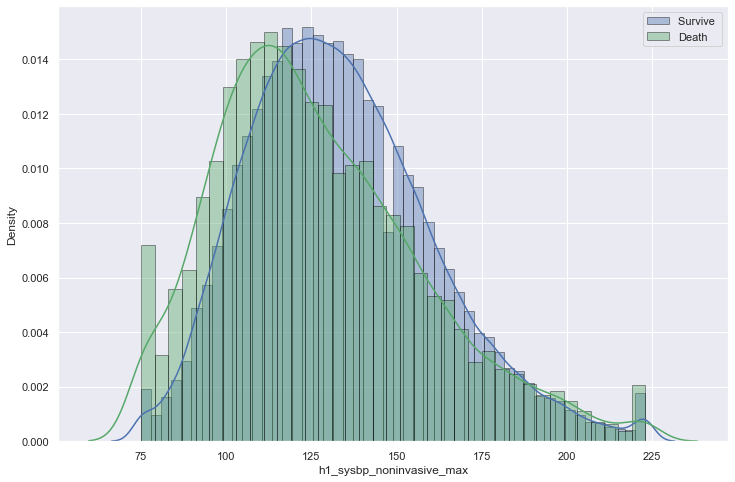

_______________________________________________________________________________
H1_SYSBP_NONINVASIVE_MIN

0    115.0
1     71.0
2    124.0
3      NaN
4    120.0
Name: h1_sysbp_noninvasive_min, dtype: float64

Description: The patient's lowest systolic blood pressure during the first hour of their unit stay, non-invasively measured


Number of Null values:
7341

Value Counts:
110.0    1335
115.0    1315
106.0    1311
118.0    1298
112.0    1291
         ... 
54.0       54
191.0      43
192.0      40
193.0      24
194.0      24
Name: h1_sysbp_noninvasive_min, Length: 143, dtype: int64

count    84372.000000
mean       116.549625
std         26.623528
min         53.000000
25%         98.000000
50%        115.000000
75%        134.000000
max        195.000000
Name: h1_sysbp_noninvasive_min, dtype: float64



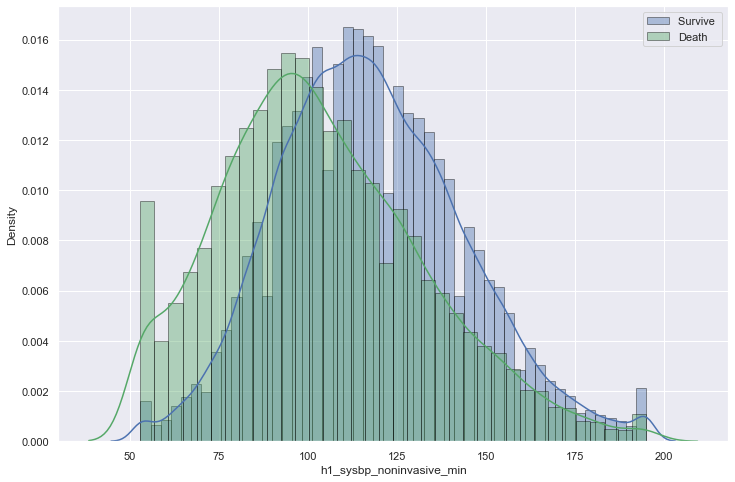

_______________________________________________________________________________
D1_GLUCOSE_MAX

0    168.0
1    145.0
2      NaN
3    185.0
4      NaN
Name: d1_glucose_max, dtype: float64

Description: The highest glucose concentration of the patient in their serum or plasma during the first 24 hours of their unit stay


Number of Null values:
5807

Value Counts:
122.0    758
112.0    746
113.0    740
107.0    726
114.0    722
        ... 
541.0      1
610.0      1
581.0      1
553.0      1
548.0      1
Name: d1_glucose_max, Length: 538, dtype: int64

count    85906.000000
mean       174.638023
std         86.687955
min         73.000000
25%        117.000000
50%        150.000000
75%        201.000000
max        611.000000
Name: d1_glucose_max, dtype: float64



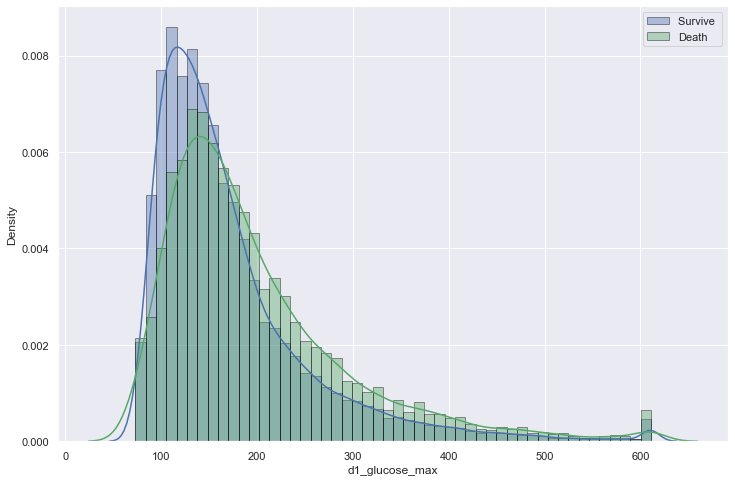

_______________________________________________________________________________
D1_GLUCOSE_MIN

0    109.0
1    128.0
2      NaN
3     88.0
4      NaN
Name: d1_glucose_min, dtype: float64

Description: The lowest glucose concentration of the patient in their serum or plasma during the first 24 hours of their unit stay


Number of Null values:
5807

Value Counts:
97.0     1354
96.0     1351
92.0     1323
95.0     1318
98.0     1299
         ... 
287.0      10
280.0       9
278.0       8
269.0       8
284.0       6
Name: d1_glucose_min, Length: 256, dtype: int64

count    85906.000000
mean       114.380940
std         38.273013
min         33.000000
25%         91.000000
50%        107.000000
75%        131.000000
max        288.000000
Name: d1_glucose_min, dtype: float64



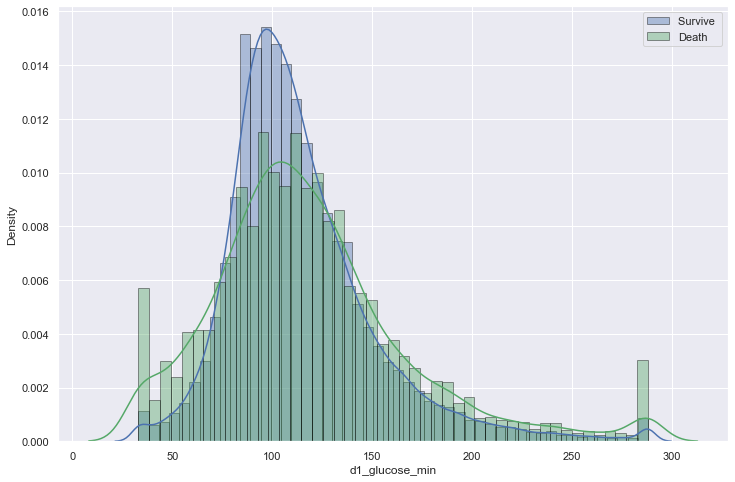

_______________________________________________________________________________
D1_POTASSIUM_MAX

0    4.0
1    4.2
2    NaN
3    5.0
4    NaN
Name: d1_potassium_max, dtype: float64

Description: The highest potassium concentration for the patient in their serum or plasma during the first 24 hours of their unit stay


Number of Null values:
9585

Value Counts:
4.00    6280
4.10    6266
4.20    6042
3.90    5767
4.30    5327
        ... 
4.82       1
4.29       1
3.67       1
5.04       1
3.86       1
Name: d1_potassium_max, Length: 100, dtype: int64

count    82128.000000
mean         4.251594
std          0.667355
min          2.800000
25%          3.800000
50%          4.200000
75%          4.600000
max          7.000000
Name: d1_potassium_max, dtype: float64



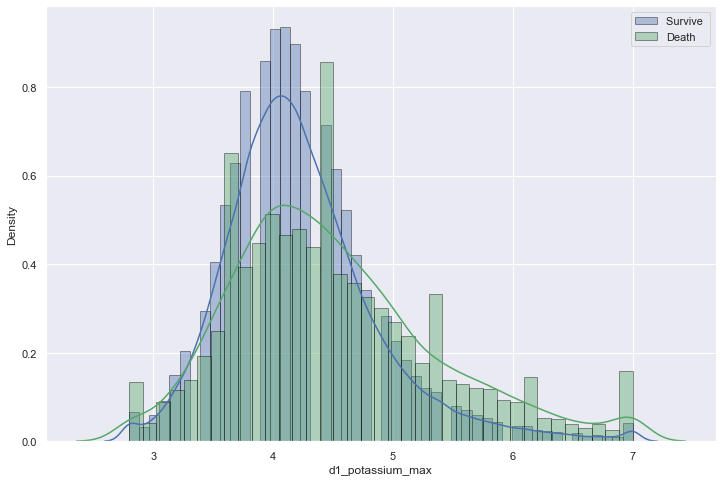

_______________________________________________________________________________
D1_POTASSIUM_MIN

0    3.4
1    3.8
2    NaN
3    3.5
4    NaN
Name: d1_potassium_min, dtype: float64

Description: The lowest potassium concentration for the patient in their serum or plasma during the first 24 hours of their unit stay


Number of Null values:
9585

Value Counts:
3.90    6364
3.80    6312
4.00    6130
3.70    5833
4.10    5645
        ... 
3.89       1
4.99       1
4.75       1
4.91       1
3.39       1
Name: d1_potassium_min, Length: 116, dtype: int64

count    82128.000000
mean         3.934658
std          0.579610
min          2.400000
25%          3.600000
50%          3.900000
75%          4.300000
max          5.800000
Name: d1_potassium_min, dtype: float64



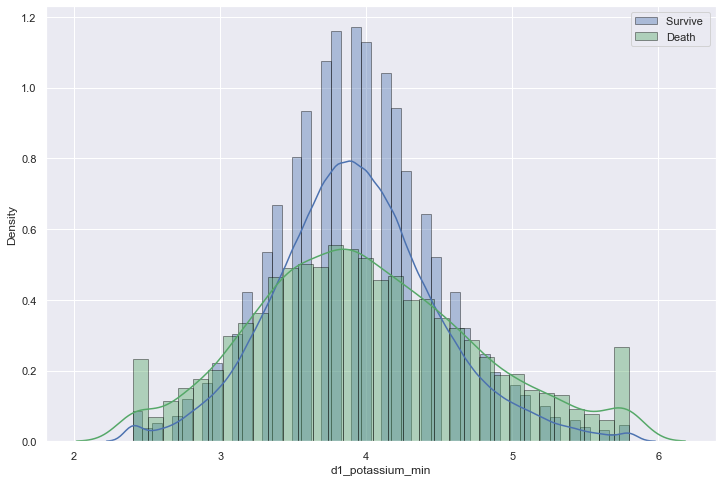

_______________________________________________________________________________
APACHE_4A_HOSPITAL_DEATH_PROB

0    0.10
1    0.47
2    0.00
3    0.04
4     NaN
Name: apache_4a_hospital_death_prob, dtype: float64

Description: The APACHE IVa probabilistic prediction of in-hospital mortality for the patient which utilizes the APACHE III score and other covariates, including diagnosis.


Number of Null values:
7947

Value Counts:
0.01    11023
0.02     9970
0.03     7504
0.04     5996
0.05     4869
        ...  
0.95       22
0.96       21
0.97       11
0.98        5
0.99        1
Name: apache_4a_hospital_death_prob, Length: 101, dtype: int64

count    83766.000000
mean         0.086787
std          0.247569
min         -1.000000
25%          0.020000
50%          0.050000
75%          0.130000
max          0.990000
Name: apache_4a_hospital_death_prob, dtype: float64



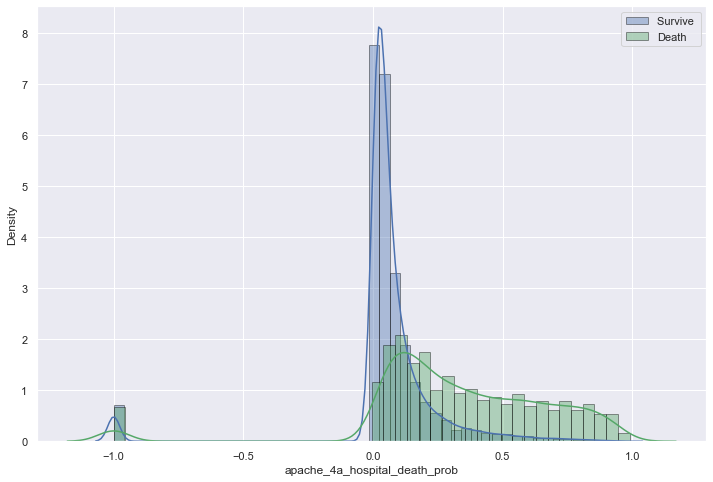

_______________________________________________________________________________
APACHE_4A_ICU_DEATH_PROB

0    0.05
1    0.29
2    0.00
3    0.03
4     NaN
Name: apache_4a_icu_death_prob, dtype: float64

Description: The APACHE IVa probabilistic prediction of in ICU mortality for the patient which utilizes the APACHE III score and other covariates, including diagnosis


Number of Null values:
7947

Value Counts:
0.01    21087
0.02    11733
0.00     9694
0.03     7253
0.04     5068
        ...  
0.92       12
0.94       11
0.95        6
0.97        4
0.96        3
Name: apache_4a_icu_death_prob, Length: 99, dtype: int64

count    83766.000000
mean         0.043955
std          0.217341
min         -1.000000
25%          0.010000
50%          0.020000
75%          0.060000
max          0.970000
Name: apache_4a_icu_death_prob, dtype: float64



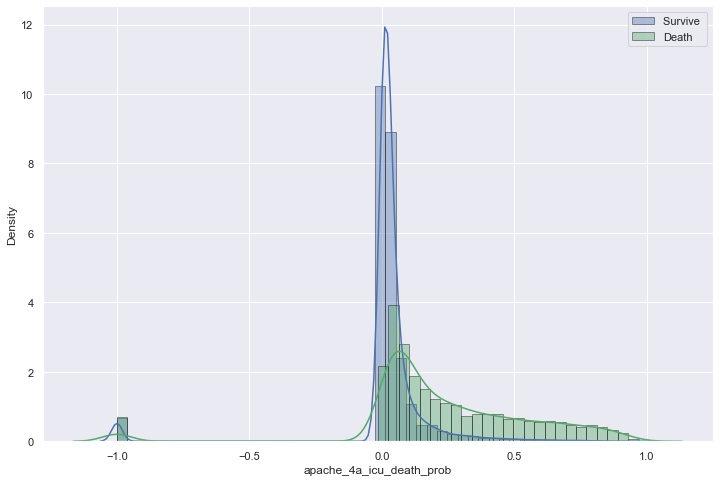

_______________________________________________________________________________
AIDS

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: aids, dtype: float64

Description: Whether the patient has a definitive diagnosis of acquired immune deficiency syndrome (AIDS) (not HIV positive alone)


Number of Null values:
715

Value Counts:
0.0    90920
1.0       78
Name: aids, dtype: int64

count    90998.000000
mean         0.000857
std          0.029265
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: aids, dtype: float64



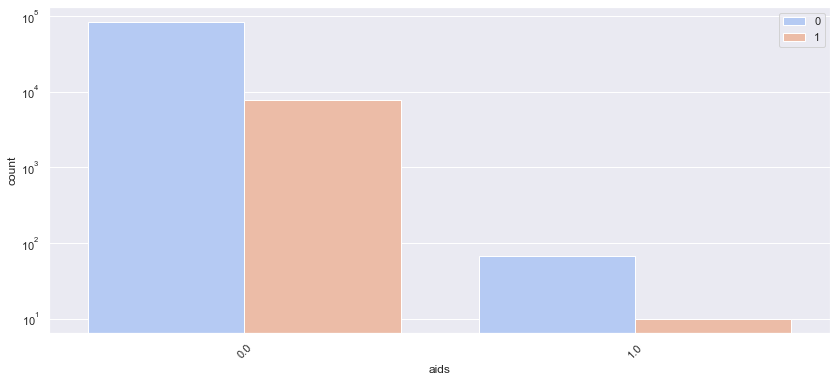

_______________________________________________________________________________
CIRRHOSIS

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: cirrhosis, dtype: float64

Description: Whether the patient has a history of heavy alcohol use with portal hypertension and varices, other causes of cirrhosis with evidence of portal hypertension and varices, or biopsy proven cirrhosis. This comorbidity does not apply to patients with a functioning liver transplant.


Number of Null values:
715

Value Counts:
0.0    89570
1.0     1428
Name: cirrhosis, dtype: int64

count    90998.000000
mean         0.015693
std          0.124284
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: cirrhosis, dtype: float64



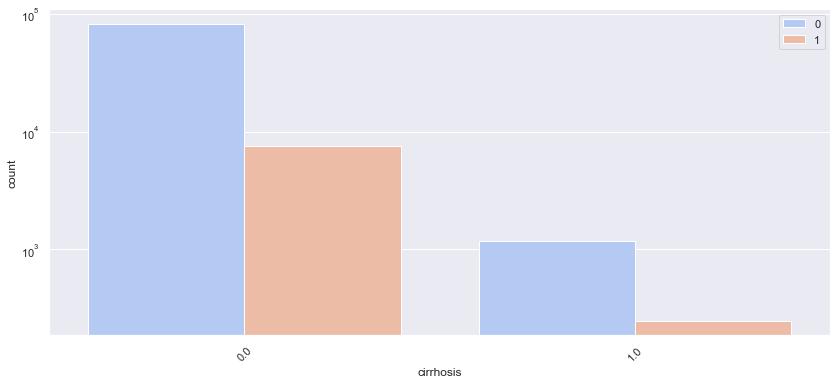

_______________________________________________________________________________
DIABETES_MELLITUS

0    1.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: diabetes_mellitus, dtype: float64

Description: Whether the patient has been diagnosed with diabetes, either juvenile or adult onset, which requires medication.


Number of Null values:
715

Value Counts:
0.0    70506
1.0    20492
Name: diabetes_mellitus, dtype: int64

count    90998.000000
mean         0.225192
std          0.417711
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: diabetes_mellitus, dtype: float64



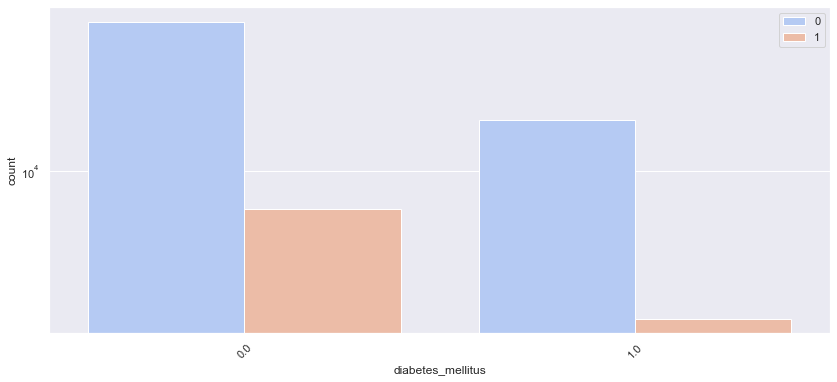

_______________________________________________________________________________
HEPATIC_FAILURE

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: hepatic_failure, dtype: float64

Description: Whether the patient has cirrhosis and additional complications including jaundice and ascites, upper GI bleeding, hepatic encephalopathy, or coma.


Number of Null values:
715

Value Counts:
0.0    89816
1.0     1182
Name: hepatic_failure, dtype: int64

count    90998.000000
mean         0.012989
std          0.113229
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: hepatic_failure, dtype: float64



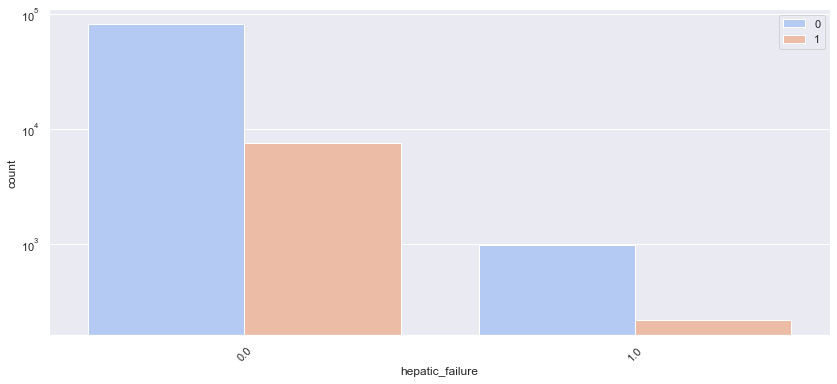

_______________________________________________________________________________
IMMUNOSUPPRESSION

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: immunosuppression, dtype: float64

Description: Whether the patient has their immune system suppressed within six months prior to ICU admission for any of the following reasons; radiation therapy, chemotherapy, use of non-cytotoxic immunosuppressive drugs, high dose steroids (at least 0.3 mg/kg/day of methylprednisolone or equivalent for at least 6 months).


Number of Null values:
715

Value Counts:
0.0    88617
1.0     2381
Name: immunosuppression, dtype: int64

count    90998.000000
mean         0.026165
std          0.159628
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: immunosuppression, dtype: float64



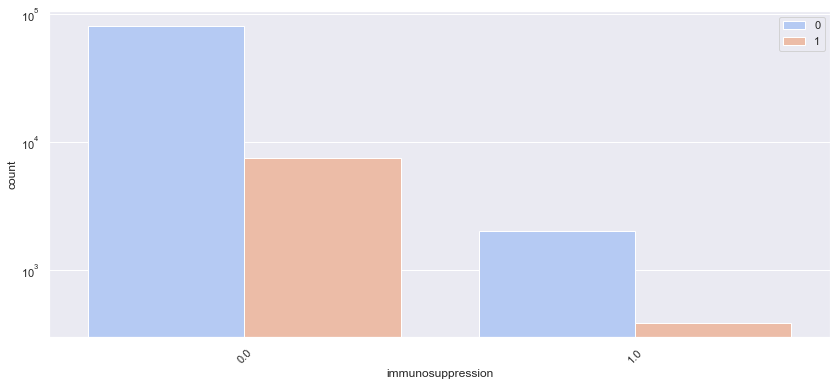

_______________________________________________________________________________
LEUKEMIA

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: leukemia, dtype: float64

Description: Whether the patient has been diagnosed with acute or chronic myelogenous leukemia, acute or chronic lymphocytic leukemia, or multiple myeloma.


Number of Null values:
715

Value Counts:
0.0    90355
1.0      643
Name: leukemia, dtype: int64

count    90998.000000
mean         0.007066
std          0.083763
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: leukemia, dtype: float64



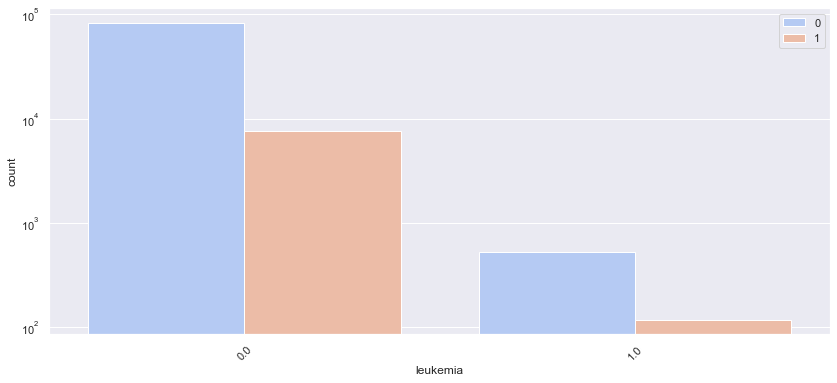

_______________________________________________________________________________
LYMPHOMA

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: lymphoma, dtype: float64

Description: Whether the patient has been diagnosed with non-Hodgkin lymphoma.


Number of Null values:
715

Value Counts:
0.0    90622
1.0      376
Name: lymphoma, dtype: int64

count    90998.000000
mean         0.004132
std          0.064148
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: lymphoma, dtype: float64



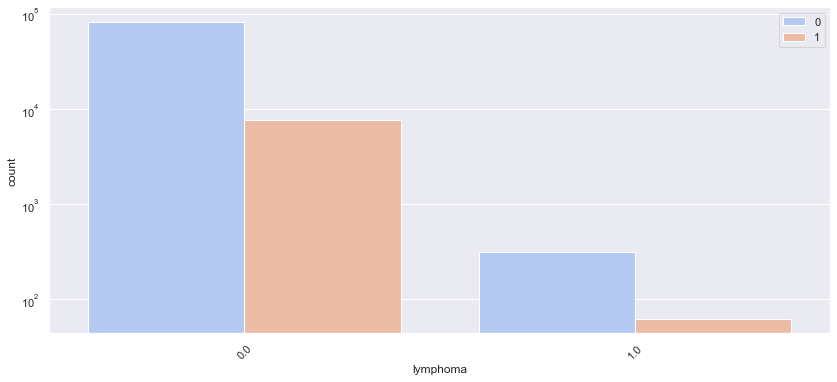

_______________________________________________________________________________
SOLID_TUMOR_WITH_METASTASIS

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: solid_tumor_with_metastasis, dtype: float64

Description: Whether the patient has been diagnosed with any solid tumor carcinoma (including malignant melanoma) which has evidence of metastasis.


Number of Null values:
715

Value Counts:
0.0    89120
1.0     1878
Name: solid_tumor_with_metastasis, dtype: int64

count    90998.000000
mean         0.020638
std          0.142169
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: solid_tumor_with_metastasis, dtype: float64



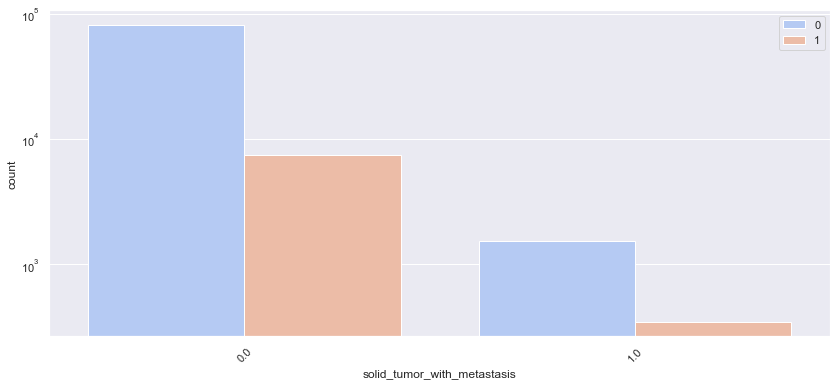

_______________________________________________________________________________
APACHE_3J_BODYSYSTEM

0            Sepsis
1       Respiratory
2         Metabolic
3    Cardiovascular
4            Trauma
Name: apache_3j_bodysystem, dtype: object

Description: Admission diagnosis group for APACHE III


Number of Null values:
1662

Value Counts:
Cardiovascular          29999
Neurological            11896
Sepsis                  11740
Respiratory             11609
Gastrointestinal         9026
Metabolic                7650
Trauma                   3842
Genitourinary            2172
Musculoskeletal/Skin     1166
Hematological             638
Gynecological             313
Name: apache_3j_bodysystem, dtype: int64

count              90051
unique                11
top       Cardiovascular
freq               29999
Name: apache_3j_bodysystem, dtype: object



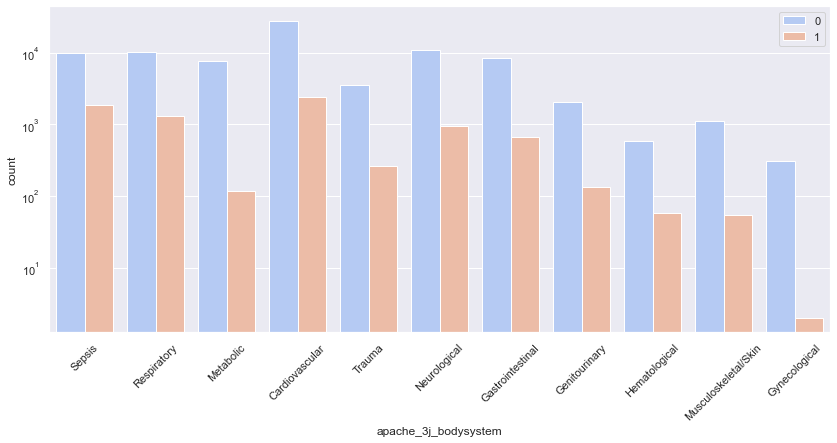

_______________________________________________________________________________
APACHE_2_BODYSYSTEM

0    Cardiovascular
1       Respiratory
2         Metabolic
3    Cardiovascular
4            Trauma
Name: apache_2_bodysystem, dtype: object

Description: Admission diagnosis group for APACHE II


Number of Null values:
1662

Value Counts:
Cardiovascular         38816
Neurologic             11896
Respiratory            11609
Gastrointestinal        9026
Metabolic               7650
Trauma                  3842
Undefined diagnoses     3768
Renal/Genitourinary     2460
Haematologic             638
Undefined Diagnoses      346
Name: apache_2_bodysystem, dtype: int64

count              90051
unique                10
top       Cardiovascular
freq               38816
Name: apache_2_bodysystem, dtype: object



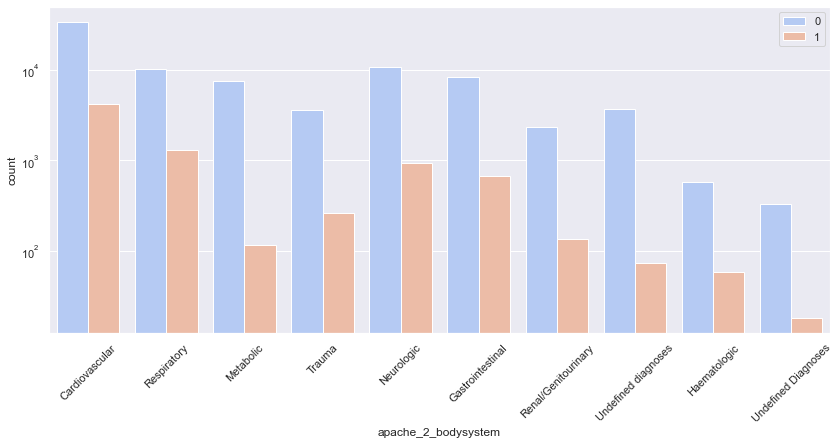

_______________________________________________________________________________
HOSPITAL_DEATH

0    0
1    0
2    0
3    0
4    0
Name: hospital_death, dtype: int64

Description: Whether the patient died during this hospitalization


Number of Null values:
0

Value Counts:
0    83798
1     7915
Name: hospital_death, dtype: int64

count    91713.000000
mean         0.086302
std          0.280811
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: hospital_death, dtype: float64



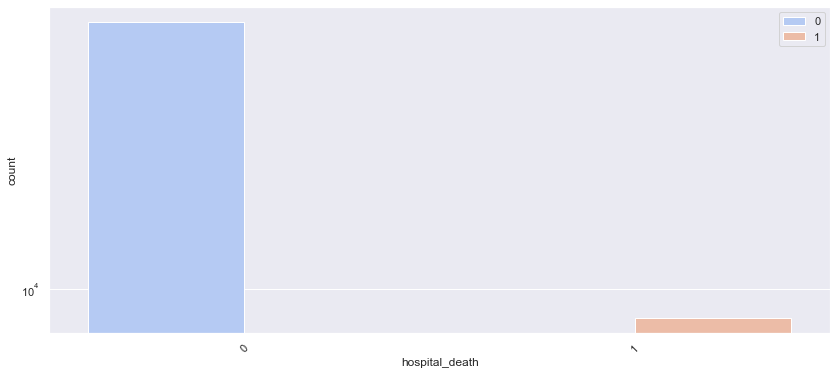

_______________________________________________________________________________


In [16]:
cat_col=[]
num_col=[]

for i in data.columns[3::]:
    print(i.upper())
    print('')
    print(data[i].head(5))
    
    print('')
    print(f'Description: {dict_description[i]}')
    print('')
    
    
    print('')
    print('Number of Null values:')
    print(data[i].isnull().sum())
    
    print('')
    print('Value Counts:')
    print(data[i].value_counts())
    print('')
    print(data[i].describe(include=all))
    print('')    
  
    
    if data[i].value_counts().shape[0]>20:
    
        plt.figure(figsize=(12,8))
        sns.distplot(data[i][data['hospital_death']==0],color='b', label='Survive ',hist_kws={'edgecolor':'black'})
        _=sns.distplot(data[i][data['hospital_death']==1],color='g',label='Death',hist_kws={'edgecolor':'black'})
        plt.legend()
        plt.show()        
        num_col.append(i)       
        
        
    else:
        plt.figure(figsize=(14, 6))
        sns.countplot(x=i, hue="hospital_death", data=data, palette='coolwarm')
        plt.legend(loc='upper right')
        plt.yscale('log')
        plt.xticks(rotation=45)
        plt.show()
        
        if data[i].dtype != np.object:
            num_col.append(i)  
        else:
            cat_col.append(i)     
    
    print('_______________________________________________________________________________')

### Preparing two lists of variables for transformers.

In [17]:
cat_col

['ethnicity',
 'gender',
 'icu_admit_source',
 'icu_stay_type',
 'icu_type',
 'apache_3j_bodysystem',
 'apache_2_bodysystem']

In [18]:
num_col

['age',
 'bmi',
 'elective_surgery',
 'height',
 'icu_id',
 'pre_icu_los_days',
 'weight',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'arf_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'heart_rate_apache',
 'intubated_apache',
 'map_apache',
 'resprate_apache',
 'temp_apache',
 'ventilated_apache',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_resprate_max',
 'd1_resprate_min',
 'd1_spo2_max',
 'd1_spo2_min',
 'd1_sysbp_max',
 'd1_sysbp_min',
 'd1_sysbp_noninvasive_max',
 'd1_sysbp_noninvasive_min',
 'd1_temp_max',
 'd1_temp_min',
 'h1_diasbp_max',
 'h1_diasbp_min',
 'h1_diasbp_noninvasive_max',
 'h1_diasbp_noninvasive_min',
 'h1_heartrate_max',
 'h1_heartrate_min',
 'h1_mbp_max',
 'h1_mbp_min',
 'h1_mbp_noninvasive_max',
 'h1_mb

### Removing hospital death from data because it is our target variable

In [19]:
num_col.remove('hospital_death')

### Export both lists for modeling

In [20]:
pd.DataFrame(cat_col).to_csv('cat_col.csv')
pd.DataFrame(num_col).to_csv('num_col.csv')